# Regularized Models

#### A good way to reduce overfitting is to regularize the model (i.e., to constrain it) : the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. 

#### Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients (typically achieved by constraining the weights of the model).

#### Example: 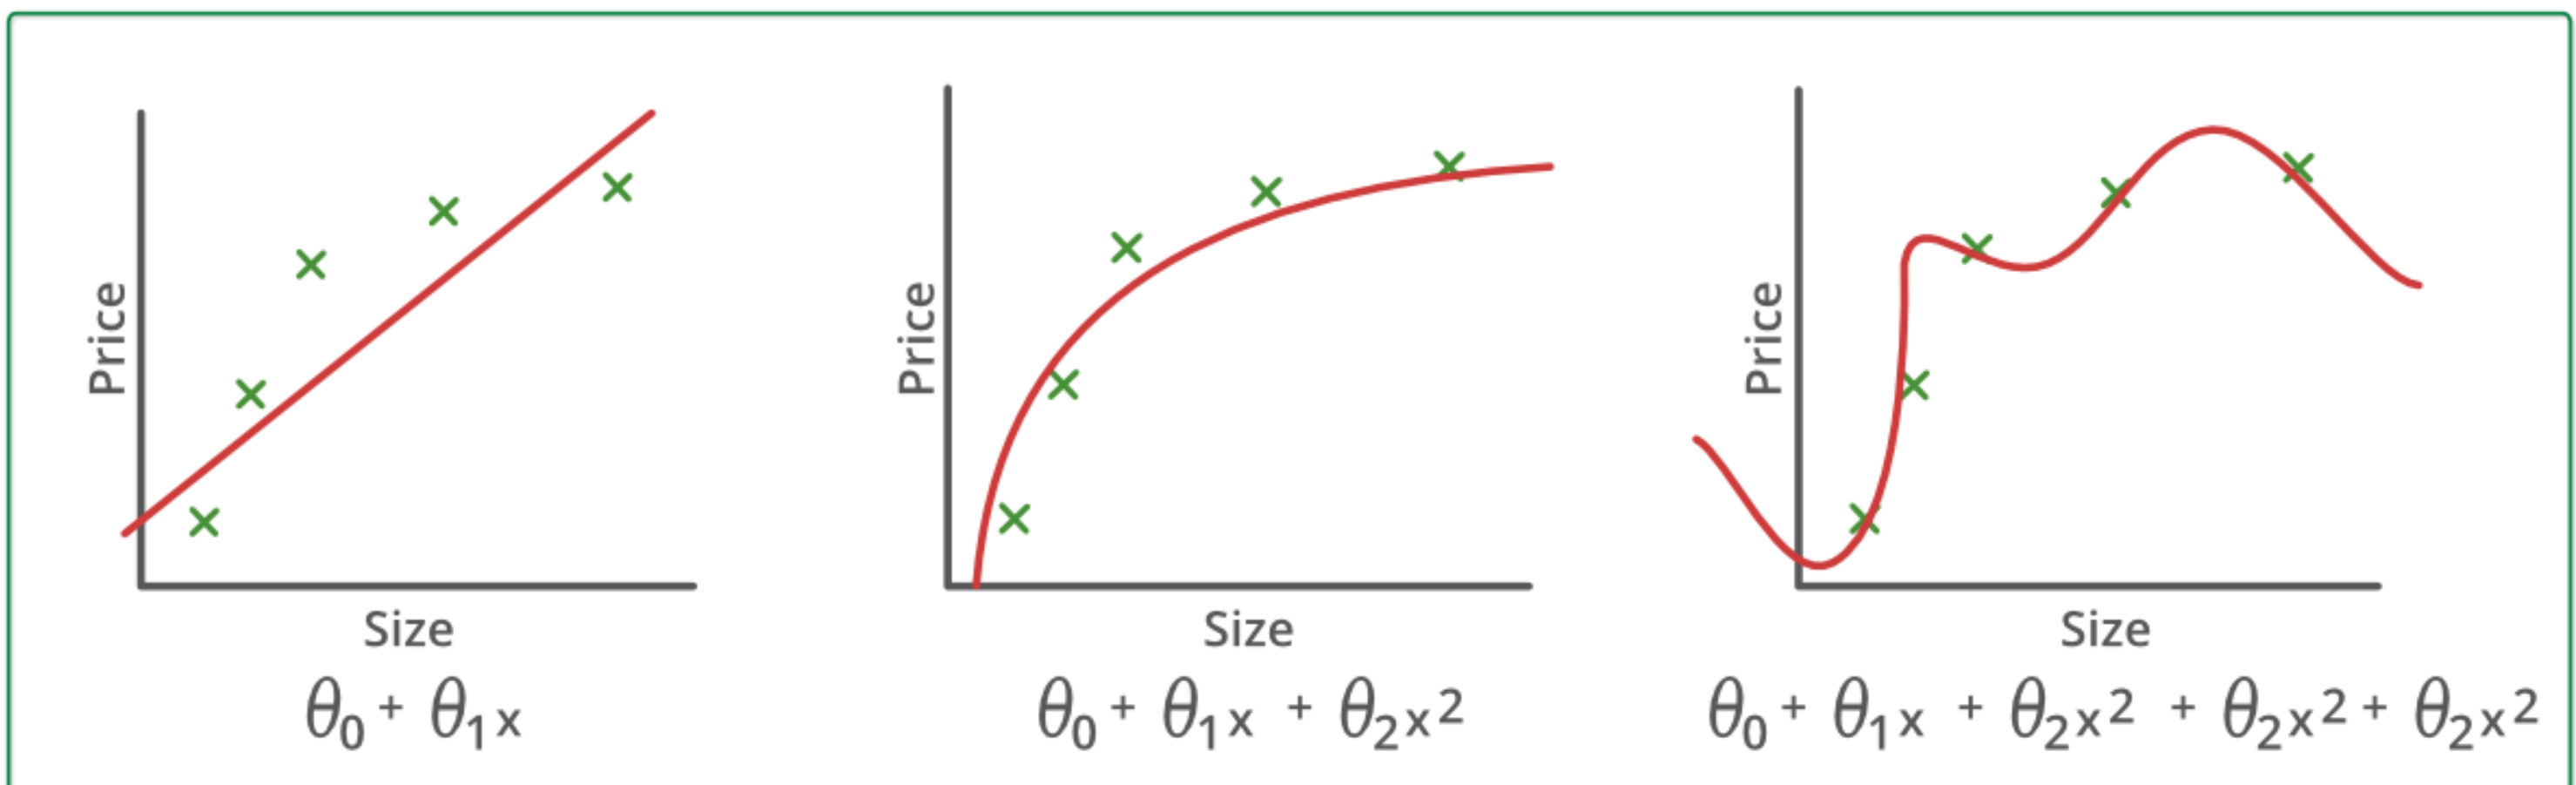


## Ridge regression (L2)

#### Ridge Regression (also called Tikhonov regularization) is a regularized version of linear regresion : a regularization term (penalty equivalent to square of the magnitude of the coefficients)  is added to the cost function, thereby altering the cost function. 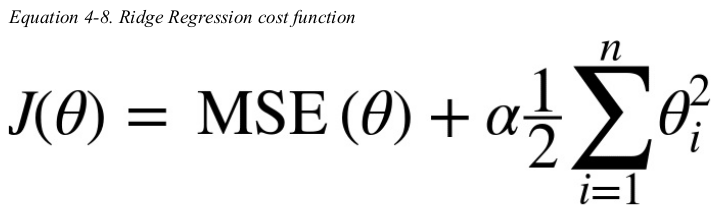 So ridge regression puts constraint on the coefficients (theta). 

#### The penalty term or hyperparameter 'α' regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce overfitting.

#### The hyperparameter α controls how much you want to regularize the model. when α → 0 , the cost function becomes similar to the linear regression cost function. So lower the constraint (low α) on the features, the model will resemble linear regression model. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean

In [1]:
 # Imports

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import psycopg2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_rows', None) #magic command
pd.set_option('display.max_columns', None)


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Chap_4_regularization_of_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
x = pd.read_csv('final_df_ch2.csv')

In [3]:
x.drop(columns=['subject_id', 'hadm_id'], inplace=True)


In [4]:
x.head(10)

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,ICU,Neuro_ICU,APR,HCFA,ADM_AMBULATORY OBSERVATION,ADM_DIRECT EMER.,ADM_DIRECT OBSERVATION,ADM_ELECTIVE,ADM_EU OBSERVATION,ADM_EW EMER.,ADM_OBSERVATION ADMIT,ADM_SURGICAL SAME DAY ADMISSION,ADM_URGENT,INS_Medicaid,INS_Medicare,INS_Other,ETH_AMERICAN INDIAN/ALASKA NATIVE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_MARRIED,MAR_SINGLE,MAR_Unknown,MAR_WIDOWED,GEN_0.0,GEN_1.0
0,1.013194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,2.321528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
3,0.420833,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
4,0.757639,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
5,0.518056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
6,1.470139,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
7,1.194444,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
8,0.313889,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
9,0.427778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [5]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)

[[-0.46811129 -0.46990373 -0.7356169  ... -0.3202921   1.04226354
  -1.04226354]
 [-0.27506056 -0.46990373 -0.7356169  ... -0.3202921   1.04226354
  -1.04226354]
 [-0.6077759  -0.46990373 -0.7356169  ... -0.3202921  -0.95945023
   0.95945023]
 ...
 [ 5.73215743  8.10308187  0.78903703 ... -0.3202921  -0.95945023
   0.95945023]
 [-0.24083607 -0.46990373 -0.7356169  ... -0.3202921  -0.95945023
   0.95945023]
 [-0.08282959 -0.46990373  0.28081905 ... -0.3202921  -0.95945023
   0.95945023]]


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255250 entries, 0 to 255249
Data columns (total 51 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   LOS                                255250 non-null  float64
 1   blood                              255250 non-null  float64
 2   circulatory                        255250 non-null  float64
 3   congenital                         255250 non-null  float64
 4   digestive                          255250 non-null  float64
 5   endocrine                          255250 non-null  float64
 6   genitourinary                      255250 non-null  float64
 7   infectious                         255250 non-null  float64
 8   injury                             255250 non-null  float64
 9   mental                             255250 non-null  float64
 10  misc                               255250 non-null  float64
 11  muscular                           2552

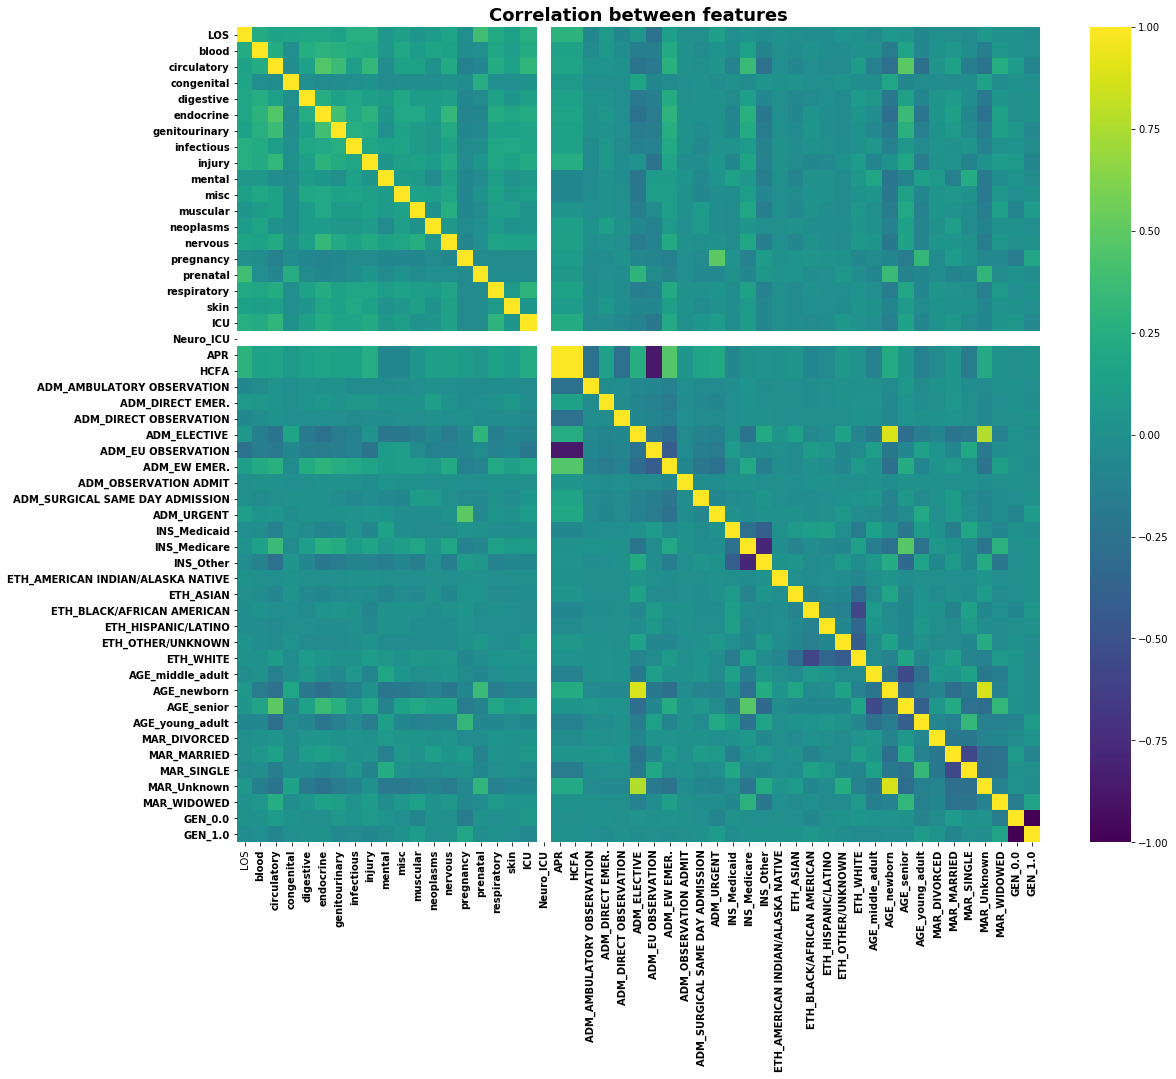

In [7]:
x_corr = x.corr()
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(x_corr, cmap='viridis')
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

In [8]:
x_corr["LOS"].sort_values(ascending=False)

LOS                                  1.000000
prenatal                             0.388369
APR                                  0.281948
HCFA                                 0.281938
ICU                                  0.259571
infectious                           0.253879
injury                               0.250275
blood                                0.219577
respiratory                          0.211037
digestive                            0.180754
endocrine                            0.179354
congenital                           0.169513
nervous                              0.166222
circulatory                          0.149115
genitourinary                        0.146963
skin                                 0.133334
misc                                 0.123920
ADM_EW EMER.                         0.114131
ADM_URGENT                           0.113054
neoplasms                            0.094777
ADM_DIRECT EMER.                     0.083780
ADM_ELECTIVE                      

In [9]:
# Target Variable (Length-of-Stay)
LOS = x['LOS'].values
print('LOS :', LOS)
# Prediction Features
features = x.drop(columns=['LOS'])
print('features :',features.shape) 
# features.info()
# 

LOS : [ 1.01319444  2.32152778  0.06666667 ... 43.03333333  2.55347222
  3.62430556]
features : (255250, 50)


In [10]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 204200 samples.
Testing set has 51050 samples.


In [11]:
from sklearn.preprocessing import StandardScaler
# standardization
scaler = StandardScaler()
xTrainStan = scaler.fit_transform(X_train)
scaler.scale_, scaler.mean_

(array([0.58338275, 1.96287116, 0.24115998, 1.04848841, 1.35255101,
        0.82581375, 0.52696912, 2.25487346, 1.07740742, 0.92267574,
        0.73203932, 0.6422092 , 0.81560447, 0.81043054, 0.82790519,
        0.68116689, 0.4802424 , 0.32833262, 1.        , 0.44402033,
        0.44400511, 0.14685239, 0.2141634 , 0.16123192, 0.34638649,
        0.41696484, 0.48386005, 0.07956515, 0.24987437, 0.28943753,
        0.31570717, 0.46986103, 0.49654325, 0.05519501, 0.20921742,
        0.3629194 , 0.23954398, 0.28573222, 0.47875595, 0.44043205,
        0.32034116, 0.49814698, 0.36990722, 0.24317776, 0.48291357,
        0.47854892, 0.32288857, 0.29059981, 0.49955679, 0.49955679]),
 array([0.27393732, 1.44360921, 0.04122919, 0.59958864, 1.06761998,
        0.43008815, 0.20369246, 2.35926543, 0.64411851, 0.54979432,
        0.35183154, 0.21919687, 0.44314887, 0.14685602, 0.24877571,
        0.31725269, 0.13893732, 0.12290891, 0.        , 0.72988247,
        0.72991185, 0.02205191, 0.04818805, 0.

In [12]:
from sklearn.linear_model import SGDRegressor
SGD_reg = SGDRegressor(random_state=42)
SGD_reg.fit(X_train, y_train)

# Make predictions with model
y_test_preds = SGD_reg.predict(X_test)
print("Predictions:", y_test_preds)

Predictions: [4.36141135 0.516975   5.24385676 ... 5.12074403 4.95425429 5.50249297]


In [13]:
SGD_mse = mean_squared_error(y_test, y_test_preds)
SGD_rmse = np.sqrt(SGD_mse)
print('SGD_rmse:', SGD_rmse)
SGD_r2 = r2_score(y_test, y_test_preds)
print('SGD_r2:', SGD_r2 )

SGD_rmse: 5.377005232654307
SGD_r2: 0.37472799175978244


In [14]:
SGD_reg.score(X_train, y_train)

0.3693821608158976

In [15]:
SGD_reg.score(X_test, y_test)

0.37472799175978244

In [16]:
# Regularized linear models

In [18]:
from sklearn.linear_model import Ridge
ridge_reg1 = Ridge(alpha=1, random_state=42)
ridge_reg1.fit(X_train, y_train)
y_test_preds1 = ridge_reg1.predict(X_test)

print("Predictions:", y_test_preds1)



Predictions: [4.79723573 0.58716591 5.32721856 ... 4.77046504 4.80917405 5.75898636]


In [19]:
ridge_mse = mean_squared_error(y_test,y_test_preds1)
ridge_mse = np.sqrt(ridge_mse)
print('ridge_mse :', ridge_mse)
ridge_r2 = r2_score(y_test,y_test_preds1)
print('ridge_r2:', ridge_r2 )

ridge_mse : 5.368581924717153
ridge_r2: 0.3766854878241731


In [20]:
ridge_reg1.score(X_train, y_train)

0.37171164481437324

In [21]:
ridge_reg1.score(X_test, y_test)

0.3766854878241731

In [22]:
ridge_reg100 = Ridge(alpha=1000, random_state=42)
ridge_reg100.fit(X_train, y_train)
y_test_preds100 = ridge_reg1.predict(X_test)

print("Predictions:", y_test_preds100)
print(ridge_reg100.score(X_train, y_train))
print(ridge_reg100.score(X_test, y_test))

Predictions: [4.79723573 0.58716591 5.32721856 ... 4.77046504 4.80917405 5.75898636]
0.37133445575100943
0.37653695090977424


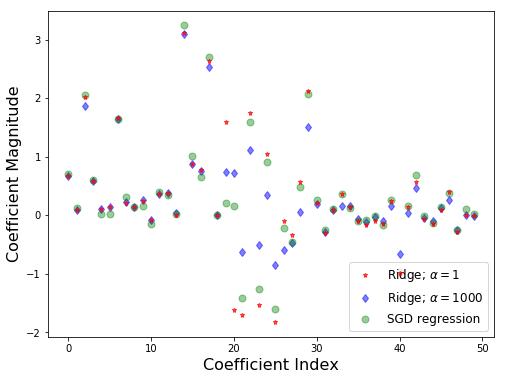

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(ridge_reg1.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 1$',zorder=7) 
plt.plot(ridge_reg100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1000$') 
plt.plot(SGD_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='SGD regression') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=12,loc=4)
plt.show() 

### and using Stochastic Gradient Descent


#### The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ norm of the theta vector: this is simply Ridge Regression.

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = "l2", random_state=42)
sgd_reg.fit(X_train, y_train)
y_test_preds = sgd_reg.predict(X_test)
print("Predictions:", y_test_preds)

Predictions: [4.36141135 0.516975   5.24385676 ... 5.12074403 4.95425429 5.50249297]


In [26]:
SGD_mse = mean_squared_error(y_test, y_test_preds)
SGD_rmse = np.sqrt(SGD_mse)
print('SGD_rmse:', SGD_rmse)
SGD_r2 = r2_score(y_test, y_test_preds)
print('SGD_r2:', SGD_r2 )

SGD_rmse: 5.377005232654307
SGD_r2: 0.37472799175978244


### Alternatively you can use the Ridge class with the “sag” solver. Stochastic Average GD is a variant of Stochastic Gradient Descent.

In [27]:
ridge_reg = Ridge(alpha=1000, solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)
y_test_preds_sag = ridge_reg.predict(X_test)

print("Predictions:", y_test_preds_sag)

Predictions: [4.72806647 0.5819335  5.38169328 ... 4.6942637  4.80551699 5.78665486]


In [28]:
_mse = mean_squared_error(y_test, y_test_preds_sag)
_rmse = np.sqrt(_mse)
print('_rmse:', _rmse)
_r2 = r2_score(y_test, y_test_preds_sag)
print('_r2:', _r2 )

_rmse: 5.369231782174419
_r2: 0.3765345764267576


In [29]:
ridge_reg.score(X_train, y_train)

0.3713339858586271

In [30]:
ridge_reg.score(X_test, y_test)

0.3765345764267576

# Lasso Regression

#### Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the theta vector instead of half the square of the ℓ2 norm. 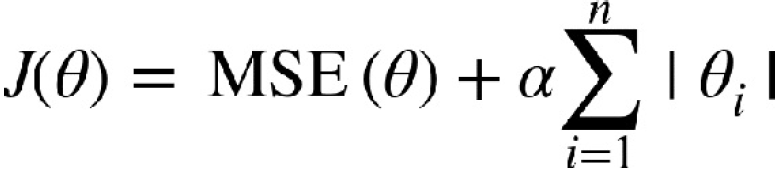

#### This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()             ## The default value of regularization parameter in Lasso regression (given by α) is 1.
lasso.fit(X_train,y_train)

y_test_preds = lasso.predict(X_test)
print("Predictions:", y_test_preds)


train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

Predictions: [3.49027248 2.41421245 3.90735532 ... 3.08178868 4.89830115 3.02559908]
training score: 0.18433161752093086
test score:  0.19487381692001093
number of features used:  5


In [33]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.3705893174975371
test score for alpha =0.01:  0.3756477056582326
number of features used: for alpha =0.01: 31


In [34]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.37170843661377295
test score for alpha =0.0001:  0.37669124368375473
number of features used: for alpha =0.0001: 45


In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.37171184558557024
LR test score:  0.37668459137011545


In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10e5, alpha=0.0001, tol= 1e-7, penalty="l1", random_state=42)
sgd_reg.fit(X_train, y_train.ravel())
y_test_preds_l1 = sgd_reg.predict(X_test)
print("Predictions:", y_test_preds_l1)

Predictions: [4.39706168 0.56107042 5.26149112 ... 5.04962517 4.98465172 5.54439285]


In [38]:
SGD_mse_l1 = mean_squared_error(y_test, y_test_preds_l1)
SGD_rmse_l1 = np.sqrt(SGD_mse_l1)
print('SGD_rmse:', SGD_rmse_l1)
SGD_r2_l1 = r2_score(y_test, y_test_preds_l1)
print('SGD_r2:', SGD_r2_l1 )

print(sgd_reg.score(X_train,y_train))
print(sgd_reg.score(X_test,y_test))

SGD_rmse: 5.376843290718556
SGD_r2: 0.3747656544475385
0.36941378137806613
0.3747656544475385


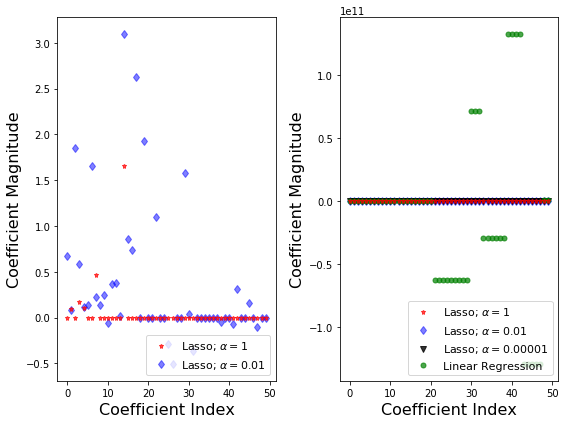

In [139]:
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=11,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjgAAAGoCAYAAABL+58oAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvAOZPmwAAIABJREFUeJzs3Xt8VfWZ7/HPszcJUKWIQFruCVRGQS6RCHK0Koo36iAaBJHR1uqhVXucaeucSo9THdup2FqtrQ7WlzoVtVZG2pF2KFQrXjpVkYDcHeRihwCaCAiIQCD7OX+sHQwhl51k7fv3/Xrt19q/tVbWenYwj89ea/1+P3N3RERERHJJJN0BiIiIiIRNBY6IiIjkHBU4IiIiknNU4IiIiEjOUYEjIiIiOUcFjoiIiOQcFTgiIiEys8fNrMrMView79lmtszMDpvZ5AbbFprZR2b2++RFK5K7VOCIiITrl8DFCe77P8BXgF81su3HwDXhhCSSf1TgiIiEyN1fBXbWX2dmg+JXZCrM7DUzOzm+73vuvhKINXKcPwF7UxK0SA7qkO4ARETywCPA1939XTMbA/wrcF6aYxLJaSpwRESSyMyOB/4X8O9mVre6Y/oiEskPKnBERJIrAnzk7iPTHYhIPtEzOCIiSeTue4DNZnYlgAVGpDkskZxnmk1cRCQ8ZvYMcC7QA/gAuAN4CZgN9AIKgF+7+11mdjrwW6AbcAB4392Hxo/zGnAycDywA7je3Rel9tOIZC8VOCIiIpJzdItKREREck5ePGTco0cPLy4uTncYIjmvoqLiQ3fvme440kW5RiT5Es0zeVHgFBcXs3Tp0nSHIZLzzOyv6Y4hnZRrRJIv0TyjW1QiIiKSc1TgiIiISM5RgSMiIiI5RwWOiIiI5BwVOCIiIpJzVOCIiIhIzlGBIyIiIjlHBY6IiIjkHBU4IiIiknNU4IiIiEjOUYEjIiIiOUcFTh6pqoJ77w2WIiIiuSwvJtsUqKmB2bNh7VrYtw9mzoTCwnRHJSIiyRbzGBXbKti4ayODug2itFcpy7cvT7g9qvcoIpZ910NU4OSJefNg82Y45ZRgOW8eTJuW7qhERCSZYh7jthdvY/HmxdR6LREiRCIRYh4j5rEW21GLMq5kHLPGz8q6Iie7opU2Wb4cFiyAfv2Cdr9+QXv58vTGJSIiyVWxrYLFmxdTdHwRfT7bh44FHVlTtYZO0U4JtYuOL+KlzS9Rsa0i3R+l1VTg5IG5c6FrV4hGg3Y0GrTnzk1vXCIiklwbd20MrtzEr77sP7Qfx9l/eH9C7YgFV3M27dqUng/QDipw8sCUKbB7N9TWBu3a2qA9ZUp64xIRkeQa1G0QUYsS8xgAnQs6YxidO3ROqB3zGBGLMLDbwPR8gHZQgZMHSkthwgTYsiVob9kStEtL0xuXiIgk16jeoxhXMo4PPv6ArXu2cuDQAYYWDeVA7YGE2h98/AHnlZzHqN6j0v1RWk0PGeeJ8nJYvz7oRTVkSNAWEZHcFrEIs8bPomJbBZt2bWJgt4FHekkl2s7WXlTm7umOIenKysp86dKl6Q4j7aqqYM4cuPZaKCpKdzSSi8yswt3L0h1HuijXiCRfonlGV3DySFER3HpruqMQERFJvoy65mRmncxsiZmtMLM1ZvbPjezT0cyeNbMNZvammRWnPlIRERHJZBlV4AAHgfPcfQQwErjYzM5osM/1wC53/wJwP3BPimMUERGRDJdRBY4HPo43C+Kvhg8JXQY8EX//HHC+mVmKQhQREZEskFEFDoCZRc3sbaAKeMHd32ywSx9gC4C7HwZ2A90bOc4MM1tqZkurq6uTHbaIiIhkkIwrcNy91t1HAn2B0WZ2ahuP84i7l7l7Wc+ePcMNUkRERDJaxhU4ddz9I2AxcHGDTVuBfgBm1gHoCuxIbXQiIiKSyTKqwDGznmZ2Qvx9Z+AC4J0Gu80Hvhx/Pxl4yfNhMB8RERFJWKaNg9MLeMLMogTF11x3/72Z3QUsdff5wGPAk2a2AdgJXJW+cEVERCQTZVSB4+4rgWNmSHL379V7fwC4MpVxiYiISHbJqFtUIiIiImFQgSMiIiI5RwWOiIiI5BwVOCIiIpJzVOCIiIhIzlGBIyIiIjlHBY6IiIjkHBU4IiIiknNU4IiIiEjOUYEjIiIiOUcFjoiIiOQcFTgiIiKSc1TgiIiISM5RgSMiIiI5RwWOiIiI5BwVOCIiIpJzVOCIiIhIzlGBIyIiIjlHBY6IiIjkHBU4IiIiknNU4IiIiEjOUYEjIiIiOUcFjoiIiOQcFTgiknfM7HEzqzKz1U1sNzP7mZltMLOVZnZaqmMUkfZRgSNNqqqCe+8NliI55pfAxc1svwQ4Kf6aAcxOQUwiEiIVONKomhqYPRveeitY1tSkOyKR8Lj7q8DOZna5DJjjgTeAE8ysV2qiE5EwqMCRRs2bB5s3wymnBMt589IdkUhK9QG21GtXxtcdw8xmmNlSM1taXV2dkuBEpGUqcOQYy5fDggXQr1/Q7tcvaC9fnt64RDKRuz/i7mXuXtazZ890hyMicSpw5Bhz50LXrhCNBu1oNGjPnZveuERSaCvQr167b3ydiGQJFThyjClTYPduqK0N2rW1QXvKlPTGJZJC84Fr472pzgB2u/v2dAclIonrkO4AJPOUlsKECbBoERQXw5YtQbu0NN2RiYTDzJ4BzgV6mFklcAdQAODuDwMLgAnABuAT4Lr0RCoibaUCRxpVXg7r18PatTBkSNAWyRXuPq2F7Q7cnKJwRCQJdItKGlVYCDfeCKefHiwLC9MdkYiISOJ0BUeaVFQEt96a7ihERERaT1dwREREJOeowBEREZGck1EFjpn1M7PFZrbWzNaY2d83ss+5ZrbbzN6Ov76XjlhFREQkc2XaMziHgW+7+zIz6wJUmNkL7r62wX6vufulaYhPREREskBGXcFx9+3uviz+fi+wjibmfxERERFpSkYVOPWZWTFQCrzZyOaxZrbCzP5gZkNTGpiIiIhkvEy7RQWAmR0PzAP+wd33NNi8DBjg7h+b2QTgP4CTGjnGDGAGQP/+/ZMcsYiIiGSSjLuCY2YFBMXN0+7+m4bb3X2Pu38cf78AKDCzHo3spxl+RURE8lRGFThmZsBjwDp3v6+JfT4f3w8zG03wGXakLkoRERHJdJl2i+pM4BpglZm9HV/3XaA/HJkEbzJwo5kdBvYDV8XnjREREREBMqzAcfc/A9bCPg8CD6YmIhEREclGGXWLSkRERCQMKnBEREQk56jAERERkZyjAkdERERyjgocERERyTkqcERERCTnqMARERGRnKMCR0RERHKOChwRERHJOSpwREREJOeowBEREZGcowJHREREco4KHBEREck5KnBEREQk53RIdwAiIiK5IuYxKrZVsHHXRgZ1G0Rpr1KWb1/eZHtU71FETNcakkEFjoiISAhiHuO2F29j8ebF1HotESJEIhFiHiPmsWPaUYsyrmQcs8bPUpGTBPqNioiIhKBiWwWLNy+m6Pgi+ny2Dx0LOrKmag2dop0abRcdX8RLm1+iYltFukPPSSpwREREQrBx18bgyk38asz+Q/txnP2H9zfajlhwNWfTrk1pizmXqcAREREJwaBug4halJjHAOhc0BnD6Nyhc6PtmMeIWISB3QamLeZclnCBY2bHmdktZvacmS02s5Pi668ys5OTF6KI5BPlGslWo3qPYlzJOD74+AO27tnKgUMHGFo0lAO1Bxptf/DxB5xXch6jeo9Kd+g5KaGHjM2sH/Ay0Bd4BzgV6BLfPA4YD9yQhPhEJI8o10g2i1iEWeNnUbGtgk27NjGw28AjvaaaaqsXVfIk2ovqJ8BBYDCwFaipt+0V4I6Q4xKR/KRcI1ktYhFO73M6p/c5/ci6ltqSHIkWOBcAM9z9r2YWbbBtK9An3LBEJE8p14hIKBK9LlYI7G1iW1fgcDjhiEieU64RkVAkWuCsBMqb2HYJoE78IhIG5RoRCUWit6h+DDxnZgC/iq8bYmaXAdcDE5MQm4jkH+UaEQlFQgWOu//GzG4CZgFfja+eQ3Ap+RvuvjBJ8YlIHlGuEZGwJDwXlbs/bGZPAmOBImAH8Bd3b+p+uYhIqynXiEgYWjXZprvvA15MUiwiIoByjYi0X5MFjpmd3ZoDufur7Q9HRPKNco2IJENzV3BeBjz+3uq9b0rDMStERBLxMso1IhKy5gqccfXenwD8HFgN/Br4APgcMA0YCtycrABFJOcp14hI6JoscNz9lbr3ZvZL4I/u3nAOmDlm9hhwBfC7pEQoIjlNuUZEkiHRgf4uA55tYtuz8e0iIu2lXCMioUi0wIkAX2hi20nonriIhEO5RkRCkWiB85/A3WZ2Zd0EeGYWNbMpwA+A3ycrQBHJK8o1IhKKRMfBuQXoR3CJ+LCZ7QK6xX/+z/HtIiLtpVwjIqFIdKqGD4EvmtkFwBlAL2A78Lq7hzYYl5n1IxiW/XMEXUUfcfcHGuxjwAPABOAT4CvuviysGEQkfVKVa0Qk97V2JOMXgBeSFAvAYeDb7r7MzLoAFWb2gruvrbfPJQT34k8CxgCz40sRyREpyDUikuMSfQYnJdx9e93VmPi8M+uAPg12uwyY44E3gBPMrFeKQxUREZEMltAVHDOL0cLoou4eau8GMysGSoE3G2zqA2yp166Mr9ve4OdnADMA+vfvH2ZoIpIk6cg1IpKbEr1FdRfHJp3uwIVAR+CXIcaEmR0PzAP+wd33tOUY7v4I8AhAWVlZS0O/i0hmSFmuMbOLCZ7niwKPuvusBtu/AvwY2Bpf9aC7PxrW+UUkuRJ9yPjOxtbHu3H+DtgdVkBmVkBQ3Dzt7r9pZJetBL0s6vTl0wQkIlksVbkmfryHgAsIrgK/ZWbzGzzvB/Csu38jjHOKSGq16xkcd68F/hX4hzCCifeQegxY5+73NbHbfOBaC5wB7Hb37U3sK0lUVQX33hssRZIp7FwDjAY2uPsmd68hmPdKoySL5JBW9aJqQkfgxBCOA3AmcA2wyszejq/7LtAfwN0fBhYQdBHfQNBN/LqQzi2tUFMDs2fD2rWwbx/MnAmFhemOSnJcmLmmsWf5GuuNWW5mZwPrgW+6+5aGO+h5P5HMlOhDxo391RYCpwKzgKVhBOPufwashX0czSicdvPmwebNcMopwXLePJg2Ld1RSbZLVa5J0O+AZ9z9oJl9DXgCOK/hTnreTyQzJXoF5z0a79lgwEZUcOSV5cthwQIoLg7a/foF7ZNPhtLStIYm2e89UpNrWnyWz9131Gs+CvwopHOLSAokWuB8lWOTzgHgr8Bb8fvjkifmzoWuXSEa76wbjQbtuXNV4Ei7pSrXvAWcZGYlBIXNVcDV9Xcws171nu+bSDAul4hkiUR7Uf0yyXFIFpkyBe67D7p1C4qb2lrYvRuuvz7dkUm2S1WucffDZvYNYBFBN/HH3X2Nmd0FLHX3+cAtZjaRYIT1ncBXUhGbiIQjoV5UZrbJzEY0se1UM9sUbliSyUpLYcIE2BJ/3HLLlqCtqzfSXqnMNe6+wN0Hu/sgd/+X+LrvxYsb3H2muw919xHuPs7d3wnr3CKSfIl2Ey8m6MHQmE7AgFCiyWDqEn208nIoKYF164JleXm6I5IcUUye5xoRCUdrxsFpqndAGfBRCLFkrLou0W+9FSxratIdUfoVFsKNN8LppwdLdRGXEOVtrhGR8DT5DI6ZfRP4ZrzpwO/MrOH/2jsTjEvx6+SElxnUJbpxRUVw663pjkKynXKNiCRDcw8ZbwL+FH//ZYLxJ6ob7HMQWEvQhTInqUu0SNIp14hI6JoscNz9eeB5gGAGBe5y980piitjqEu0SHIp14hIMiT0DI67X5evCWfKlKALdG189I26LtFTpqQ3LpFclM+5RkTC1dwzON8DHnX3bfH3zXF3/364oWWGui7RixYFt6nUJVokXMo1IpIMzT2DcyewENgWf98cB3I26ZSXw/r1wcSSQ4aoS7RIyO5EuUZEQtbcMziRxt7no7ou0XPmwLXXqku0SJiUa0QkGRKdiyrvqUu0iIhI9mh1gWNmRQQjih7F3f8nlIhERFCuEZH2SajAMbPPAg8AU2l6GPVoWEGJSH5SrhGRsCR6BechoBx4DFhFMOiWiEjYlGtEJBSJFjgXA//o7g8lMxgRyXvKNSISitb0WPjvpEUhIvIp5RoRabdEC5xfA3+bzEBERFCuEZGQJHqL6o/AT82sC7AA2NlwB3d/KczARCQvKdeISCgSLXCejy9LgK/UW++AxZfq2SAi7aVcIyKhSLTAGZfUKPJEVdWnoyEXFaU7GpGMpFwjIqFIqMBx91eSHUiuq6mB2bOD+az27YOZMzXlg0hDyjUiEhbN+5Ii8+bB5s1wyinBct68NASxciVMnRosRUREcliiIxk391BfDNgNVACPufsHYQSWS5YvhwULoLg4aPfrF7RPPhlKS1MUxKWXBpVV584wbRqUlMDvf5+ik4skRrlGRMKS6BUcA/4GOBcYQDA/zIB4+xSCBwL/CVhtZkNCjzLLzZ0LXbtCNP5oZDQatOfOTWEQP/whFBRAr17B8u67U3hykYQp14hIKBItcO4DDgBl7j7I3f+Xuw8CTo+v/2fgJKAa+JekRJrFpkyB3buhtjZo19YG7SlTUhjE8OEQicDWrcFy2LAUnlwkYco1IhKKRAucHwB3uvuy+ivdvYIg4fzA3SuBHwNnhxti9isthQkTYMuWoL1lS9BO2e2pOhdeCLffHixFMpNyjYiEItFu4oMJvjE1phr4Qvz9RuC49gaVi8rLYf36oBfVkCFBO+VmzQqWV1yRhpOnh7rmZx3lGhEJRaJXcN4D/ncT22bEtwP0AHa0L6TcVFgIN94Ip58eLNVFPPnquua/9VawrKlJd0SSgPdQrhGRECR6Becu4CkzWwnMA6qAIqAcOBW4Or7feODNsIPMFUVFcOut6Y4ifzTWNX/atHRHJS1QrhGRUCQ60N8zZvYhwT3w7wIFwCFgKXChu78Y3/VbQG0yAhVpjYzomi+tplwjImFJ9AoO7v4C8IKZRQguD3/o7rEG+xwIOT6RNmmua74KnMymXCMiYWj1SMbuHnP3qoYJRySTZETXfGkX5RoRaY+Er+CYWSFwCcEgXJ0abHZ3/36YgYm0R13X/EWLgttUaeuaL62mXCMiYUh0qobewJ+BYsAJRhsl/r6Oko5klIzomi+tolwjImFJ9BbVjwnGoOhPkHDGAAMJRhLdEH8fCjN73MyqzGx1E9vPNbPdZvZ2/PW9sM4tuUVd87NSynKNiOS2RG9RfRG4FdgWb8fc/T3ge2YWBX4GXBZSTL8EHgTmNLPPa+5+aUjnkxymrvlZJ5W5RkRyWKJXcLoD2+IP++0DutXb9hLBRHihcPdXgZ1hHU9EskrKco2I5LZEC5xKgu6aEAyRXn8yo9EEk+Cl0lgzW2FmfzCzoY3tYGYzzGypmS2trm5q5HcRyTCZlmtEJEsleotqMXAO8B/AL4CHzGwkwQBcF8XXpcoyYIC7f2xmE+IxndRwJ3d/BHgEoKyszBtuF5GMlEm5RkSyWKIFzu3AiQDuPtvMOgBTgc8APyIYXj0l3H1PvfcLzOxfzayHu3+YqhhEJGkyJteISHZLdKqGD4EP67V/Dvw8WUE1x8w+D3zg7m5mowlus2nSPZEckEm5RkSyW8ID/aWKmT1D8CBhDzOrBO4gmI8Gd38YmAzcaGaHgf3AVe6uW1AiIiJyRJMFjpm15lKwu/sdIcSDuzc737O7P0jQjVxEckC6co2I5LbmruDcztEjiTbHCa60iIi0lnKNiISuuW7i+4CPgX8Dxrl7pJlXNDXhikgOUq4RkdA1V+B8DvgGwZDpL5rZZjO7y8y+kJrQRCRPKNeISOiaLHDc/RN3f9LdLwBKCMafuAJYb2avm9mNZtatqZ8XEUmEco2IJENCIxm7e6W7z3L3U4HTgbcJ5oR5NJnBiUh+Ua4RkbC0qpt4fNyZawi6ah8ClicjKBHJb8o1ItJeLRY4ZjYA+Lv462+A/wK+C8x1993JDU9E8oVyjYiEqblxcG4g+AZ1JrAZeAqY4+6bUxSbiOQB5RoRSYbmruA8AuwB5gB/jq8bZ2bjGtvZ3R8POTYRyQ/KNSISupZuUX0W+Er81RwHlHREpK2Ua0QkVM0VOCUpi0JE8plyjYiErrlxcP7amlcqgxaR3JFvuaaqCu69N1hmYzsTYsj1dibEkMx2zGMsWv0Wfzfr1yxa/RaHY4ePasc8RhgsHybiLisr86VLl6Y7DJGcZ2YV7l6W7jgSYWYXAw8AUeBRd5/VYHtHgueCRgE7gKnu/l5zx2wu10yePJklby1hZ6caDh1/mNrqj4ltqyHSu5Boz+Mzvl3wcQdqtwSd2aL9umbMZ/Bth4hYRwoLe1JTU417DWaFWdkuKICammoACgt7cugQaY8p7PbBmipi4w7iJWCRDnjsEMSAiGGRDkQwPlPVkQvsAuY9N6+pv92E8kxCA/2JiOQSM4sCDwGXAEOAaWY2pMFu1wO73P0LwP3APe05Z+lppXw4cg8njdzNk3t2MWTMYfwrztAxtVnRPmnkbg6dG+PwuZ4xn2HomFpi45yR0eP5VWwvpdHjicWM0miXrGwP5zgikU5EIp0ZznEZEVPY7ZGf64QXO8O3duDZhc6w6igUwfDqKM8udIZvLWD/5w/y+dLPt+fPDdAVHBEJUbZcwTGzscCd7n5RvD0TwN3vrrfPovg+r5tZB+B9oKc3kzSbyzX/+vwL9L/lIkp2Gwc6QKdap0eN82GhcSBqmd8+DJtPiAFGyUcZ8hkOOz0OOjtiBRyKFVAYq+XE2EF2RjpSE4lmXbuj17I5Pp9sidVy0NIfU9jtgg41dOcwH3Y0DnQwOsVi9DhI0I4YnQ/Dpq7Okh89wl1Tb2jq71dXcEREmtAH2FKvXRlf1+g+7n4Y2A10b3ggM5thZkvNbGl1dXWTJ1y0ZAffP7s7hyLO+5+JcCgKN10Eh6JkRzvi3H52F24/+/jM+QwRuOmLnaiJOFXRAmrc+VbH4dR4drYP4dzb/QbuPfF6DpEZMYXeroWbz+rMoUjwb1hjxk0XQY3F2xHnrrN78j8rRrT3b1wFjohIe7j7I+5e5u5lPXv2bHK/K88fxLu9++IGvffFiAG/GdKJGNnRdoN3P9+Ldz//+Yz6DL8b/AVw43OHD4IZr/T4d7DsbDuGDf8ekZHfw8mMmEJv10ZZ1GU6sSj02l+LR5zf9RqGR4J2LAp7TpjC/5k8qt1/mwkVOGb2kpmd3MS2wWb2UrsjEZG8l8JcsxXoV6/dN76u0X3it6i6Ejxs3CZXjxvFmX0u4KWS4/hBGbxU/BmKfBiLiz+THe2S4xjXZyLj+lyWMZ9h8cDjOPW4S1jW9QzujnZgWY8xXH75YJb1GJOV7YruY7j++u589as9qOieGTGF3V7eYwxf7vMLln5mJLO6dGTpZ0r535Fl9doj+aexDzDqtBCuv7h7iy+CZ5xHN7FtFFCbyHHS9Ro1apSLSPIBS70df6upyjUEY4BtIhiDpxBYAQxtsM/NwMPx91cRzInVrlyz/0Ct/913/ug9zz3Hr7ntj75r96Gsau8/UJtxn2H3nlr/x3+s9uLi6/z//t8Pfe9ez+r2wYPuBw9mVkzp+B2EkWdak3ROb2LbFGB3GEknWS8VOCKpEVKBk5JcA0wA1gMbgf8XX3cXMDH+vhPw78AGYAkwsKVjJpJrPvjA/cc/DpbZ2M6EGHK9nQkxpLvdnETzTJO9qMzsOuC6ePNMYCWwt8FunYFTgT+5+6UtXi5KE/WiEkmNtvSiUq4RkdYIoxdVDKiNv6xBu+61A5hNMF6EiEhbKNeISOianIvK3Z8AngAws8XAje7+TqoCE5H8oFwjIsnQ0mziALj7uGQHIiKiXCMiYUmowAEws88SPJTXn+Dhu/rc3b8fZmAikp+Ua0QkDAkVOGZ2JvA74IQmdnFASUdE2kW5RkTCkuhIOj8F3gNOBzq5e6TBK5q0CEUknyjXiEgoEi1wTgFud/cKd69JZkCSu6qq4N57g6VIE5RrRCQUiRY4/wN0TGYgkttqamD2bHjrrWBZo/91SeOUa0QkFIkWOP8M3BZ/+E+k1ebNg82b4ZRTguW8eemOSDKUco2IhCLRXlSXAp8DNpvZ68DOBtvd3b8camSSM5YvhwULoLg4aPfrF7RPPhlKS9MammQe5RoRCUWiBc5ZBL0X9gBDG9ne+HwPIsDcudC1K0Tjj4dGo0F77lwVOHIM5RoRCUWiA/2VJDsQyV1TpsB990G3bkFxU1sLu3fD9Rp0XxpQrhGRsCT6DI5Im5WWwoQJsGVL0N6yJWjr6o2IiCRLwgWOmR1nZreY2XNmttjMToqvv8rMTk5eiJILysuhpATWrQuW5eXpjkgylXKNiIQh0ZGM+wEvA32Bd4BTgS7xzeOA8cANSYhPckRhIdx4I8yZA9deG7RFGlKuEZGwJHoF5yfAQWAwMAqwetteAb4YclySg4qK4NZbg6VIE5RrRCQUiRY4FwB3uPtfObYXw1agT1gBmdnjZlZlZqub2G5m9jMz22BmK83stLDOLSJpl7JcIyK5LdECpxDY28S2rsDhcMIB4JfAxc1svwQ4Kf6aAcwO8dwikl6pzDUiksMSLXBWAk09FnoJUBFOOODur3Ls4F71XQbM8cAbwAlm1ius84tIWqUs14hIbkt0oL8fA8+ZGcCv4uuGmNllwPXAxCTE1pQ+wJZ67cr4uu31dzKzGQRXeOjfv3/KghORdsmkXCMiWSyhKzju/hvgJuBK4MX46jnAPwDfcPeFyQmv7dz9EXcvc/eynj17pjscEUlANuYaEclMiV7Bwd0fNrMngbFAEbAD+Iu7N3W/PFm2Av3qtfvG14lIDsigXCMiWSzhAgfA3ffx6beqdJkPfMPMfg2MAXa7+/YWfkZEskiG5BoRyWJNFjhmdjawzN0/jr9vVvzh4HYzs2eAc4EeZlYJ3AEUxM/xMLAAmABsAD4BrgvjvCKSHunKNSKS25q7gvMycAawJP6+qVl8Lb4tGkZA7j6the0O3BzGuUQkI7xMGnKNiOS25gqcccDaeu9FRJKSmxcmAAAgAElEQVRBuUZEQtdkgePurzT2XkQkTMo1IpIMCXUTN7PBZnZOE9vOrpvtV0SkPZRrRCQsifai+inBJeTGvl1dCgyJLyWLVFV9Oru3JsCUDKFcI3kl5jEqtlWwcddGBnUbxKjeowCOWlfaq5Tl25e3uT2q9ygilujEBbkj0QKnDHi4iW2vAl8OJxxJlZoamD0b1q6Ffftg5kwoLEx3VCLKNZI/Yh7jthdvY/HmxdR6LVGLcm7xuWDw8uaXqfVaIkSIRCLEPEbMY61uRy3KuJJxzBo/K++KnEQ/bRfgQBPbDhFMgidZZN482LwZTjklWM6bl+6IRADlGskjFdsqWLx5MUXHF9Hns30oOr6I36//Pf+5/j+PrOtY0JE1VWvoFO3UpnbR8UW8tPklKrbl3zRuiRY4m4Dzm9h2HvBeKNFISixfDgsWQL/4eND9+gXt5cvTG5cIyjWSRzbu2hhcpYlfWYlYhAOHD7D/0P4j6/Yf2o/j7D+8v03tiAVXczbt2pTqj5d2iRY4c4BvmtnNZtYRwMw6mtnNBHPEPJGsACV8c+dC164QjY8mEo0G7blz0xuXCMo1kkcGdRtE1KLEPAYEt6w6dehE54LOR9Z1LuiMYXTu0LlN7ZjHiFiEgd0GpvrjpZ0F4+a1sJNZFHgWuAKIATuBEwkKpHnAVPf4v0YGKisr86VLl6Y7jIyxfDncdx8UFwfFTW0tvPcefOtbUFqa7ugkm5lZhbuXtePnlWskb9Q9g/PS5peOFCLjiseBweLNi4l5DMOIRqJHnqlpbTtiEc4rOS+nnsFJNM8k9JCxu9cCk83sPOACoDvwIfBHd3+5PYFK6pWWwoQJsGhRUORs2RK0VdxIuinXSD6JWIRZ42dRsa2CTbs2MbDbwKN6UdWtq+sV1dZ2vvaiSugKTrbTt6pj1dTA3XcHvaiGDFEvKglHe6/gZDvlGpHkSzTP5F9JJ0BQzNx4I5x+erBUcSMiIrmkudnEa4Gx7r7EzGI0PQEeBHNgJjqmjmSIoiK49dZ0RyH5TrlGRJKhuURxF1BZ733u38sSkXRQrhGR0DVX4CwH9gG4+50piUbSSlM3SJoo14hI6Jp7Bue3wN9AcAnZzEanJiRJh7qpG956K1jW1KQ7IskjyjUiErrmCpyP+XRYdEtBLJJGmrpB0ki5RkRC19wtqgrgF2b2arz9T2ZW3cS+7u7XhxuapErd1A3FxUG7buqGk0/W2DiSEso1IhK65gqcG4H7gbMJHvobDTR140IPBWax5qZuUIEjKaBcIyKha7LAcff/BiYAxLtu/q27L0lVYJI6U6YEUzd06/bp1A27d8P1+p4sKaBcIyLJ0OQzOGb2GzP7Qrx5HbA9NSGlR1UV3HtvsMw3dVM3bNkStDV1g6RSvuUaEUmN5h4yvoxgHhiAx4FeyQ8nPdSDCMrLoaQE1q0LluXl6Y5I8kje5BoRSZ3mCpwPgDPi740cvvetHkSaukHSKm9yjYikTnMFzlzg/vgw6g68ER+jorHX4dSEG766HkT9+gXtuh5Ey5enN650qJu6QYP8SYrlRa4RkdRqrhfVN4H/AoYAdwC/BLamIKaUUg8ikbTLi1wjIqnVXC8qB/4dwMy+Ajzg7itSFFfKqAeRSHrlS64RkdRq7hbVEe5ekqsJRz2IRDJHLucaEUmthAocADPrY2b3mdlSM9tkZqfG1/+DmY1JXojJpx5EIpkjl3ONiKROQgWOmQ0FVgHXANuAAUBdP5sBwN8nJboUaUsPonweN0ckWXI914hI6iR6BecnwDqgBLiCoyfE+wufdvHMWq3pQaRxc0SSJum5xsxONLMXzOzd+LJbE/vVmtnb8df89p5XRFIr0QLnLGCWu3/MsWNUfAB8PtSoMpzGzRFJmlTkmtuAP7n7ScCf4u3G7Hf3kfHXxBDOKyIplGiBE2tmWw9gfwixZAWNmyOSVKnINZcBT8TfPwFMCuGYIpJhEi1wlhDMEdOYKQRjWOSF5sbNEZF2S0Wu+Zy718139T7wuSb26xR/0PkNM2uyCDKzGfH9llZXV4cQnoiEobmB/ur7PvCimf0R+BXBpePxZvb3wOXA2UmKL+No3ByRpAol15jZizR+O+v/1W+4u5tZU1NDDHD3rWY2EHjJzFa5+8aGO7n7I8AjAGVlZZpmQiRDJDoOzisEl3FLCCbDM2AW8EVgkru/mbQIM4zGzRFJnrByjbuPd/dTG3k9D3xgZr0A4stG+0K6+9b4chPwMqC/cpEskvA4OO7+n/GH8gYTPAh4irsPdPc/JC26DKVxc0SSJwW5Zj7w5fj7LwPPN9zBzLqZWcf4+x7AmcDakM4vIimQ6C2qI9x9A7AhCbFkjbpxc+bMgWuv1czbIsmQxFwzC5hrZtcDfyV4tgczKwO+7u43AKcAvzCzGMEXwVnurgJHJIu0ZiTjYWb2nJlVm9nh+HKumQ0LMyAzu9jM/tvMNpjZMd03zewr8XPXjU9xQ5jnT5Rm3hZJjmTnGnff4e7nu/tJ8VtZO+Prl8aLG9z9L+4+zN1HxJePhXFuEUmdhK7gmNnpwCsEXTTnE/Q8+Dzwt8CXzOxsd69obzBmFgUeAi4AKoG3zGx+I9+cnnX3b7T3fCKSWVKVa0Qk9yV6i+puYDVwvrvvrVtpZl2AF+PbLwwhntHAhvhDfZjZrwnGrNClYZH8kKpcIyI5LtFbVGcAd9dPOADx9j3A2JDi6QNsqdeujK9rqNzMVsYvY/dr7EAam0IkK6Uq14hIjku0wGlpbIdUjv3wO6DY3YcDL/DpiKRHB+T+iLuXuXtZz549UxheK6xcCVOnBksRgczKNSKSxRItcN4Evhu/THyEmR0HfAd4I6R4tgL1r8j0ja87Iv6A4MF481FgVEjnTq1LL4Vp02DjxmB56aXpjkgkE6Qq14hIjkv0GZzvEgx09Vcz+z2wneDBvwnAZ4BzQ4rnLeAkMyshKGyuAq6uv4OZ9ao3zPpEgpmHs88Pfxj0Me/VKxgt8O670x2RSCZIVa4RkRyXUIHj7kvM7Azge8BFwInATmAx8H13XxVGMO5+2My+ASwCosDj7r7GzO4Clrr7fOAWM5sIHI7H8JUwzp1yw4dDJAJbtwbLYaH2thfJSqnKNSKS+xIe6M/dVwKTkxhL3XkWAAsarPtevfczgZnJjiMlLrwQRo+GJUvSHYlIxkhVrpHcEPMYFdsq2LhrI4O6DaK0VynLty9PW3tU71FELOEh5iSJmixwzCwCfAnY7O6rm9hnGMEDv79LUny5bdasYHnFFemNQySNlGukrWIe47YXb2Px5sXUei0RIkQiEWIeI+axlLejFmVcyThmjZ+lIicDNPcv8HfAM8C+ZvbZCzxjZtNCjUrapKoK7r03WIpkEeUaaZOKbRUs3ryYouOL6PPZPnQs6MiaqjV0inZKS7vo+CJe2vwSFds0FmUmaKnA+Td339zUDu7+HvAYn05cJylUv6CpqYHZs+Gtt4JlTU26oxNJmHKNtMnGXRuDKzfxqyX7D+3HcfYf3p+WdsSCqzmbdm1K0W9AmtNcgXMa8McEjvEiUBZOOJKohgXNs8/C5s1wyinBct68dEcokjDlGmmTQd0GEbUoMY8B0LmgM4bRuUPntLRjHiNiEQZ2G5ii34A0p7mHjLsAuxI4xq74vpJC8+Z9WtAsXQovvgjnnhts69cPFiyAk0+G0tK0himSCOUaaZNRvUcxrmQcL21+iZjHMIyhRUM5UHuArXu2prwdsQjnlZzHqN7ZOTxbrmmuwPkQGAD8uYVj9I/vKymyfHlQwBQXB+2dO6G6OrhV1asXRKPQtSvMnasCR7KCco20ScQizBo/i4ptFWzatYmB3QYe6dWUrrZ6UWUOc2985HMzexbo5u7NTmxnZn8Edrn71CTEF4qysjJfunRpusMIzcyZsHcv9OgRtLdvh5dfhu7dg57ntbXw3nvwrW+pwJHUMrMKd2/VbSTlGhFpjUTzTHNl5k+B883sfjMrbOQEBWb2U+A84P62hyqtNWUK7N4dFDIARUXQs2dQ4EAwMPKECSpuclGO9pRTrhGR0DV5i8rdXzezbwM/AabHvz39Nb55AHAB0B34trtrfpgUKi0NCphFi4LbVFu2wNe+Bps2wdq1MGQIlJenO0oJW92D5WvXwr59wZW8wmPKgeyjXCMiydDsSMbu/lMzW0Ywyd3lQOf4pv0E88XMcvfXkhqhNKq8HNav/7SgmToVPvoI5swJprjKhf/xydHqP1he11NuWo6MCqNcIyJha3GqBnd/FXg1Ptpo/KkPdrh7bVIjk2YVFsKNNx5d0BQVwa23pjsySYaGD5bnYk855RoRCVNr5qKKAbl15z/LqaDJH3PnBj3jotGgncs95ZRrRCQM6ssmkgUaPlheWxu0p0xJb1wiIplKBU4Gy9EeM9IGdQ+Wb9kStNVTTkSkeSpwMpTmlpKGysuhpATWrQuW6iknItI0FThp1NwVmsZ6zEh+q3uw/PTTg6V6yomINE0FTpo0d4WmrsdMv35Bu67HzPLl6YlVMkfdg+VFRemOREQks6nASZPmrtA012NGREREWqYCJw1aukKjHjMiIiLtowInDVq6QqMeMyIiIu2jAicNErlCox4zIiIibacCJw0SuUKjHjMSBo2lJCL5SgVOW61cGcxwuXJlm348kSs06jEj7aGxlEQknyU8F5XUc+mlQdenzp2D6ZxLSuD3vz9mt6qqTyfDbFikNDZZZnP7i7RWLs8+Ltnh0KFDVFZWcuDAgXSHIlkmGo1ywgkn0KNHDyKRtl2LUYHTFj/8YVCF9OoV3F+6++5jdqn79rx2LezbBzNnHnubqf5kmYnsL5KofJh9XDJfZWUlXbp0obi4GDNLdziSJdydQ4cO8cEHH1BZWUn//v3bdBzdomqL4cMhEoGtW4PlsGHA0c87tHYkYo1cLGHSWEqSCQ4cOED37t1V3EirmBmFhYX06dOHffv2tfk4uoLTVhdeCKNHw5IlwNFXYDZsgL17YeDAYNeWvj3r27aEbcoUuO8+6NYtKG7qeupdf326I5N8o+JG2qqtt6aO/HxIceSfWbPgiiuCJUdfgfmv/4Lq6sS/PevbtoRNYymJSL5TgdOE1nSvrbsCU1a4ksn/PpXyk1ayYQNUVgbbWxqJWCMXSzJoLCURyWcqcBpRUwPz7ljJ/3pgKvPuWNli99q5c+E7r13KlP+YRrddG7npz9N4Zu+lvPlmsL2lb8/6ti3JoLGURCSfqcBpRPWYS5n4zDQG1G5k4jPTqB5zabP7T5kCvzr1h9RGCvi4Sy9qIwX85vS7OeusxL8969u2JIPGUhI5WnFxMatXr053GClx6623UlJSgpnlzWeuTwVOA8uXw0N9fkikU1CsRDoV8GCfu49MhNmY0lIYNn04Bw9F6LJnKwcPRRh5zTD++Z8T//asb9siIhKmSZMm8eqrrzJgwIB0h5IWKnAamDsX9hQPBwuKFSzC3uJhLT7wW14OladcyDMDb6fylAspL2/9t2d9204+TV0gkgXaOVJ8W0yfPp2ysjKGDRvG5Zdfzq5du/jkk0+48sorGTJkCCNGjGBK/MHIptYDLFy4kNLSUoYPH87555/Phg0bjmy74YYbmD9/fqPn3759O1OnTqW0tJSRI0eyevVqzjzzTGKxWJs/01lnnUW/fv3a/PPZTt3EG6jrXvtuyYVs7zeaXluWJNS9trAQBv9mFm/MgcHXXqErMBlIgymKZIEER4oP2wMPPECPHj0AuP3227nnnnsYM2YMe/bsYe3atQDs2rULgEWLFjW6vqqqimuuuYZXXnmFIUOG8NhjjzF9+nTejD+Q+eijjzZ6bndn0qRJ3HLLLUyfPp0ZM2YwceJEHnrooaO6Sk+ePPmogqm+119/nc6dO4fwm8gdKnAaqHvg9/FFsyguhj90voIJFyX2wG/9kYkzgaZ+OJqmLhDJAgmMFJ8Mc+bM4emnn6ampoZ9+/YxePBgZsyYwbp167j55ps599xz+dKXvgTAiBEjGl3/5ptvMmLECIYMGQLAddddx0033cTevXvp0qVLk+d+4403OHDgANOnTwegd+/e9O/fn0suueSo/Z577rlkfPScpVtUjciFB3410eLR6rry112trRtMsblnq0QkDZoYKT6ZXnvtNWbPns3ChQtZtWoVP/jBDzhw4AADBw5kzZo1XHDBBbz44ouMGDGi2fVttWTJEsaMGXOk/fbbb/PVr371mP0mT57MyJEjG33t37+/zefPVRlX4JjZxWb232a2wcxua2R7RzN7Nr79TTMrDjuGXHjgNxlTP7T0/ErD7WHv355jJDqYYkvHa2877N9Be8+XjJhE2u3CC+H224NlCnz00Ud07dqV7t27c/DgQR5//HEgmEsrGo0yadIk7r//fqqrq9m5c2eT68844wxWrFjBO++8A8ATTzxBaWnpkas31157Lb/97W+POX9BQQFb4uOEPP/88yxcuJCaRr6VPvfcc7z99tuNvnR76lgZVeCYWRR4CLgEGAJMM7MhDXa7Htjl7l8A7gfuSUYs2fzAbzKuVrR0Rajh9o8/Dnf/RGJq7hiJDKbY0vHa2w77d9De33ljxw/j30Wk3RqMFB+28ePH07dv3yOvM844g0GDBjF48GDOOeccTjvtNABWrVrF2LFjGTFiBKNHj2bmzJn07t27yfU9e/bkySef5Oqrr2b48OE89dRTPPXUU0fOW1FR0ehDv1OmTGH//v2cfPLJPPjggzz99NPceeedrFixol2f85ZbbqFv375UVlYyfvx4hg4d2q7jZZuMKnCA0cAGd9/k7jXAr4HLGuxzGfBE/P1zwPkWxmQnLT2135an+hv+TGvP0cb2qw+upGtX6P1hMLJy7w9XNj71QyuOP28eHKpYyT+tnsqhiqDd3PaZM8Pdv7GYW3OM0uhKJkwAXxH8TnxF0C6NJn689rZD+R2E+Dtv7PgJHVMki7333nu8//77VFZWHnn17NmTZ599lg0bNvDGG2/wox/9iJdffplLLrmEFStWsGLFClavXs13vvMdgCbXA1x88cUsW7aMlStX8qc//YkvfOELAOzYsYPevXtTVlZ2TEw9evTg5Zdf5p133uGFF16gvLycyspKRowY0a7P+rOf/YzKykoOHz7M+++/z5o1a9p1vGxj7p7uGI4ws8nAxe5+Q7x9DTDG3b9Rb5/V8X0q4+2N8X0+bOq4ZWVlvnTp0qZPXP+p/f37j31qv6XtiRyzuhp69kz8HA33b0V7/6791Gyt5kCXnhwu6EyHQ/vZ1rEEfvf7Tx+WbsX5Gjtep73VFPbpSedux25n/3467qnm4GeDn2/v/kd+X3Ak5rYcw6urqaYnew91pkvBfnpSjTXxGRser73tUH4HzfybtPZ8jR1/94klbNoMvQ9ubvKYx/x31ICZVbj7sRk8T7SYa/LMunXrOOWUU9IdhmSxxv4bSjTPZNoVnNCY2QwzW2pmS6urq5vf+Yc/hIKC4Kn9goJjn9pvaXsix5w9u3XnaLh/K9qduxSw8uuzOVAbDFZ4oLaA7f/n7qP/p9SK8+36uIC542YTiwbHi0WD9q6PG9/+yaEC/qXPbPYdCmf/I7+vejG35Rg2ezbdioJ2t6Kgnejx2tuui2fHngI2ftKLHXva8DtoRbwt/c4bO/6/Db6bP5z1w2aP+Ycv3q1JYEUkK2RagbMVqH+Dsm98XaP7mFkHoCuwo+GB3P0Rdy9z97KePXs2f9aWntpvy1P9DX+mvLx152i4f3k5h2ojfLBsK4dqG99evz3mR+UUdoxQULWVwo4Rxn+z9eera5/QLcKrPcpxgsEPnaB9QrfGtxd2ivB8h3I6dgpn/yO/r3oxt+kY5eUUFEYY1GkrBYXNf8aGx2tv24mwuFs5MSLY9q3EPMLLJ7Y+/rZ+/pb+DYlEOOcbw1hXMLzZY67rMEyTwIpIVsi0cXDeAk4ysxKCQuYq4OoG+8wHvgy8DkwGXvIw7rNdeCGMHg1LlrRteyI/09pz1GvX1MCSrhfy5mdHM8aWMLoGCpvZv7AQPjv5QpbsGc34zy5pvCdYS/HF259ZsoQJI2DZ8gvZN3Q0x61ZwoQJ8Jk+TW//0jhYtTic/Y/6fTUTU0LHaMVnbHi89ra7d4eVn/u0feKJsKxH8/H7CRfyfPzf8Lh2fP6W/g1ZsuTIGFAtHVOTwIpINsioZ3AAzGwC8FMgCjzu7v9iZncBS919vpl1Ap4ESoGdwFXuvqm5Y+bCffFnnoFFi6C4GN57Dy66KLWD1NXUBHeJ1q6FIUOOHQW44fZvfxt+8pPw9k8kprYcozXHa0+7WzfYuxcGDgy6qNfWwsaNQVf1nTsTO17Yv/PGfj/t/Z3qGZzszzVh0jM40l7teQYn4wqcZMj2pLN8eTB9RHHxp/9zfO89+Na3UvttuqWRkRtuD3v/RGJq7+jNLR2vre0tW4J/t/hI8AB8+GFwx6l//8Z//k9/armobe/vPOzfqQqc7M41YVOBI+2lAqcF2Z50Zs4Mvv03/J9jly4pG8Vc2qm1RWqqitqwp/NQgZPduSZsKnCkvdSLKsclMkidZLa651vig5WyZQvNPs+S6MjL7ZGv03mY2ZVmtsbMYmbWZJJsaVR1EclsKnCyQGv/5yiZqTVznKWiqE3GdB5ZYjVwBfBqUzskOKq6iGQwFThZIhcmAM13rZnjLNlFbT5PPuru69z9v1vYLZFR1SVJNP+ZhEEFTpbIhQlApXVznCWzqE3FLbAs1wfYUq9dGV93jFYNKiotSvat0+LiYlavXh3uQTPU+vXrGTt2LIMHD2bs2LG8++67rd7v1ltvpaSkBDPLut+bCpwsks0TgErrJbOozfXnuszsRTNb3cgr9KswrRpUVFqUx7dOQ/f1r3+dm2++mfXr13PzzTfzta99rdX7TZo0iVdffZUBAwakKuzQqMARyWDJKmpz/bkudx/v7qc28no+wUMkMqq6hCydt06nT59OWVkZw4YN4/LLL2fXrl188sknXHnllQwZMoQRI0YwJf4NoKn1AAsXLqS0tJThw4dz/vnns2HDhiPbbrjhBubPn9/o+bdv387UqVMpLS1l5MiRrF69mjPPPJNYLNamz1NVVcWyZcuYFh9bYtq0aSxbtoyGVxlb2u+ss85qdAb0bJBpIxmLSIqUl8P69Z8O4qfnuo6SyKjqErLmbp0mu/h+4IEH6BEfi+P222/nnnvuYcyYMezZs4e1a9cCsGvXLgAWLVrU6PqqqiquueYaXnnlFYYMGcJjjz3G9OnTefPNNwF49NFHGz23uzNp0iRuueUWpk+fzowZM5g4cSIPPfQQkcin1yEmT558VMFU3+uvv07nzp2PtLds2UKfPn2Ixn+Z0WiU3r17s2XLFupfaUx0v2ykAkckT9XdAqsbBydfnusys8uBnwM9gf80s7fd/SIz6w086u4T3P2wmX0DWMSno6qvSWPYeWHKlGD8p27dPh3/afduuP765J97zpw5PP3009TU1LBv3z4GDx7MjBkzWLduHTfffDPnnnsuX/rSlwAYMWJEo+vffPNNRowYwZAhQYe76667jptuuom9e/fSpUuXJs/9xhtvcODAAaZPnw5A79696d+/P5dccslR+z333HPJ+Og5S7eoRPJYPj7X5e6/dfe+7t7R3T/n7hfF129z9wn19lvg7oPdfZC7/0v6Is4f6bp1+tprrzF79mwWLlzIqlWr+MEPfsCBAwcYOHAga9as4YILLuDFF19kxIgRza5vqyVLljBmzJgj7bfffpuvfvWrx+w3efJkRo4c2ehr//79R+3br18/tm7dSm38Qbva2lq2bdt2zO2mRPfLRipwREQkY6RjSIyPPvqIrl270r17dw4ePMjjjz8OQGVlJdFolEmTJnH//fdTXV3Nzp07m1x/xhlnsGLFCt555x0AnnjiCUpLS49cvbn22mv57W9/e8z5CwoK2BKv6p5//nkWLlxITSPdx5577jnefvvtRl/1b08BFBUVMXLkSJ555hkAnnnmGUpLS4+57ZToftlIBY6IiGSMVAyJMX78ePr27XvkdcYZZzBo0CAGDx7MOeecw2mnnQbAqlWrGDt2LCNGjGD06NHMnDmT3r17N7m+Z8+ePPnkk1x99dUMHz6cp556iqeeeurIeSsqKhq9MjJlyhT279/PySefzIMPPsjTTz/NnXfeyYoVK9r1OR9++GF+/vOfM3jwYH7+85/z8MMPH9k2YcIE6qYVaW6/W265hb59+1JZWcn48eMZOnRou2JKJc1FJaE4dOgQlZWV7bpMK9mhU6dO9O3bl4KCgmO2aS4q5Zr6NBfVp3bs2MFVV13FCy+8kO5Qskp75qLSQ8YSisrKSrp06UJxcTFmlu5wJEncnR07dlBZWUlJSUm6wxHJGt27d1dxk2K6RSWhOHDgAN27d1dxk+PMjO7du+tKnYhkPBU4EhoVN/lB/84ikg1U4IiIiEjOUYEjGevQIXj//WApIiLSGipwJCPFYlBdDfv2Bcs2TsciIiJ5SgWOZKRdu+DgQejcOVjGp3ppleLiYlavXh1+cBno1ltvpaSkBDPLm88sItIcFTiScT75JJh/pm6Ar8LCoP3JJ+mNK5NNmjSJV199lQEDBqQ7FBGRjKACR9Jr5UqYOjVYxu3cCR06QF1nHbOgvXNnOKecPn06ZWVlDBs2jMsvv5xdu3bxySefcOWVVzJkyBBGjBjBlClTAJpcD7Bw4UJKS0sZPnw4559//lGz/N5www3Mnz+/0fNv376dqVOnUlpaysiRI1m9ejVnnnkmsXbchzvrrLNyYu4YEZGwqMCR9Ln0Upg2DTZuDJaXXgrAiSfC4cNQN8i2e9A+8cRwTvvAAw+wdOlSVq1axdChQ7nnnntYtGgRe/bsYe3ataxYsYJf/OIXAE2ur6qq4pprruHpp59m5cqVXH311UdmAgZ49NFHmThx4jHndlXTODIAACAASURBVHcmTZrExIkTWb58OaNHj2bixIncfvvtRCKf/jm2ZlI9EUlcPt26Xr9+PWPHjmXw4MGMHTuWd999t9X7JWNbym6pu3vOv0aNGuWSXGvXrm39D61Y4T5ihPullwbLlSuPbPrwQ/dNm9y3bg2WH37Y+sMPGDDAV61adcz6n/zkJ37aaaf5qaee6iUlJX7RRRf5xo0bvV+/fn7TTTf53Llzfd++fe7uTa6fP3++n3/++UeOWVtb64WFhb5nz55mY/rLX/7iw4cPP9K+4447/Jxzzmn9h2tCU585bE39ewNLPQP+5tP1Uq45WmvzQnl5uffv3/+YV3l5eWgxpepvJBOMGzfOn3zySXd3f/L/t3fu8VVV177/juwkPCJGSAKYgIAcMEQhpITXxQJqoIAeGqSggIJBTD1wpHj7AKn1Q+25FSwXKopYrVx5RBCCvVgFfIA8TnmD0BATeSgSgjSQAIk8EpLM88da2e4kO5DHDntnM76fz/qszDHnXuu31tp7ZM455ppz2TJz33331bhcfeRt27bNnDhxolrPwt13qLp+RntwFO/RrRsEBEB2trXv2tWZ1bw5NGoEly9b++bNPXPKbdu2sWjRIjZs2EBaWhqzZv0X+flXaNv2TtLT0xk0aBCfffYZsbGxXLlyhTvvdG+vLbt376Z3797O9IEDB5g4cWKlctqDo9yM9OjRg8DAQCIiIpxbYGAgPXr0qPdz+1voOicnh/379zNmzBgAxowZw/79+zlz5ky1y9VHHty4kLquRaV4l8GDoVcv2L27nDkgACIiIDcXwsKstCc4f/48oaGhhIWFcflyIW+9tZiSEjh48CTR0S1ITExk8ODBREZGkpeXR2lpKS1aVLb36dOHiRMnkpmZSXR0NEuWLCEuLo5mzZoBMH78eEaMGMGIESPKnT8oKIisrCwA1q5dy4YNG3jIDs25kpqa6pkLVpQGxFNPPcWSJUsoLi4mMDCQ4uJigoKCSE5Orvdzv/LKK4SHhwPw/PPPM2fOHHr37u0MUQOcs1/ndA1du9rLQtdbtmwhJiaGt99+m3HjxrFr1y7ACl27wxgrdD116lTGjRtHcnIyw4cPZ+HChZVC164VJld27NhBkyZNnOmsrCyioqJwOBwAOBwOIiMjycrKIiIiolrljDEez3M9d32jFRzFu8yebe0ffrhSVlAQtG5dt8MnJCQQGPjD1/yLL76gY8eOdO7cmdtuC6dHj/6kpe0mLS2NJ56YgcMBJSUlPPfcc0RGRrJ+/XpmzJgBlLcDLFu2jLFjx1JcXExERATLly93nmffvn1MnTq1kp7Ro0ezatUqoqOjadu2LSkpKfziF7+gZ8+exMbG1vo6p06dyvvvv8/p06dJSEggLCyM9PT0Wh9PUbxBeHg4EyZM4K9//SvNmzenoKCASZMmERYWVu/nXrp0KSkpKRQVFXHx4kU6d+5McnIyGRkZTJkyhYEDB/Lggw8CEBsb69a+a9cuYmNjiYmJASApKYnJkydTUFDgbPy4Y+fOnVy5csU5ji8yMpI77riDoUOHliunDZ+aoRUcxW85fvy4W/t7773HpUvWLMmNGllvaRkDAwYMpXVraNr0h7JDhw6t5GTKGDJkCEOGDKlkz83NJTIykvj4+Ep54eHhbN68uZxt5MiR1b6mqliwYAELFiyo83EUxduU9eJcuXLlhvXelIWut2/fTkREBO+++y5vvvmmM0S9ceNG1q9fz8yZM0lLS6vSXltqErqubg9O27Ztyc7OpqSkBIfDQUlJCadOnaoUGrpWOWOMx/NuJDoGR7kpqc9X0cPCwvj000/rfiBFuQkp68U5ffo0EyZMuCG9N66h68LCQhYvXgzAyZMncTgcJCYmMn/+fM6cOUNeXl6V9j59+nDw4EEyMzMB3Iau//a3v1U6v7vQdVFRUaVyqampHDhwwO3mWrkBaNmyJd27d2fFihUArFixgri4uEohomuVq4+8G0p1RiI39E3fbKh/avUWlRe5eNGYY8eMOXnSelPr5Ekrbb8kpVwHfYtKfU11qK1fOHPmjElKSjJna/P65HVo166dadWqlYmKinJuOTk5ZvTo0aZjx46md+/e5te//rUZMGCAWbdunenWrZvp1q2bufvuu83s2bONMaZKuzHGrF+/3sTFxZmuXbua+++/3xw5csSZFxMTY/bs2eP2egcMGGDuuusuk5CQYFJTU01UVJQ5cOBAna41IyPD9OrVy3Tq1Mn06tXLZGZmOvOGDh3q1HKtcvWR98wzz5ioqCjjcDhMq1atTExMTJXXUJe3qMQq69/Ex8ebvXv3eluGX5ORkUGXLl28LaNG5OZCfr4VpioshFtvtQY0K9enquctIvuMMZVjczcJ6mvK0xD9Qn2Rm5vLo48+qr27NcTdd6i6fkZDVMpNS329iq4oilIRDV3feLSCo9y0lL2KHhJi7T31KrqiKIriffQtKuWmxhOvoiuKoii+h7ZZFUVRFEXxO7SCoyiKoiiK36EVHEVRFEVR/A6fqeCISAsR+VREjth7t++0iEiJiBywN/erlikNhpwcmDvX2leHq1etGYivXq1fXYqiKErDxmcqOMAMYKMxphOw0U6747Ixpru9Db9x8hRPU1QEixbBnj3W3s3EneUoLYUzZ+DiRWt/vUV227dvz6FDhzwn2Ic5fPgwffv2pXPnzvTt25cjR47UuNyvfvUrOnTogIjcNPdNUZTrY4zhYtFF8i7ncbHookfSNwJfquD8FFhi/70ESPSiFuUGsGYNfPMNdOli7desuXb5c+esCfmaNLH29gK+CvD0008zZcoUDh8+zJQpU/j5z39e43KJiYls3bqVdu3a3SjZilKJUlPKnuw9rDy0kj3Zeyg112nJ1ICqGj3Dhg3j2LFjHjtPTWnfvj3R0dHExsbSpUuXKlcd9wbGGLILsvn2wrec/v403174lllzZ/HinBed6cyzmeXyr5fOLsi+IZUcX6rgtDLGfGf/fRpoVUW5xiKyV0R2ikiVlSARSbbL7T1z5ozHxSp144svYN06KFt7rW1bK/3FF+7LX7oEFy5AcLCVDg620pcu1fzc48aNIz4+nq5duzJixAjOnTvHpUuXGDVqFDExMcTGxjJ69Gj7vO7tABs2bCAuLo5u3brxwAMPlFsEb9KkSXzwgfsI6nfffccjjzxCXFwc3bt359ChQ/Tr14/S63VJVUFOTg779+9nzJgxAIwZM4b9+/dT8Xt/vXL33nvvDV8MT1FcKTWlzPhsBpM/mszL/3iZyR9NZsZnMzxayXHHunXr6NixY72eo4zi4mK39tTUVA4ePMjq1auZPHkyp06d8tg5S0tLa12huHT1EvmF+QQFBBEUEESABPDTx35K0tNJzvTl4ssEEFCtdFBAEPmF+Vy6WgvnXUNu6Dw4IvIZ4G7Wkd+6JowxRkSqehrtjDHZInInsElE0owxlarexpg3gTfBmj69jtIVD7NqFYSGgsNhpR0OK71qFcTFVS5/rcUxXVf/rg6vvPIK4eHhADz//PPMmTOH3r17k5+fz5dffgnAObt76OOPP3Zrz8nJ4fHHH2fLli3ExMTw9ttvM27cOHbt2gVQZQvMGENiYiJTp05l3LhxJCcnM3z4cBYuXEiAy0yDNVk1OCsri6ioKBz2zXQ4HERGRpKVlVVucbvqllMUb7Hv1D4+/+ZzWt7SkgAJoNSUsumbTew7tY+eUT3r7bzt27fnww8/5J577mHgwIH07NmTHTt2cOrUKUaPHs3s2bMBq3HyzDPPcOLECS5fvsyYMWOYOXMmYIV4t2zZQlFREeHh4SxevJh27dpx/Phx4uPjeeKJJ9i0aRPJyck8/fTTVWq55557aN68OdnZ2URGRgIwZ84c1qxZQ3FxMVFRUbz11lu0bt2aCxcuMHHiRNLT04mKiiIqKoqWLVsyd+5cZs2aRXp6OhcuXODEiRPs2LGDnJwcpk2bxtmzZykqKmLatGkkJSVx6dIlJkyYQHp6OkFBQdx1112sWrWKr776isfGP0b+9/mYUsPDjz7M+Mnj+cvcv1B0uYiZf5jJ1eKrzP/9fHZu2Ykg9LuvH5NnTqY0sJSZ/zmToOAgvj72NTmncojrGcfLC18GoLCkkBBC6u2Zwg2u4BhjEqrKE5F/icjtxpjvROR2wO2wU2NMtr3/WkQ2A3GA9/oWlVoxejTMm2ctj+BwQEmJ1SPz5JPuy7doYQ0udjisyo0xUFxcu0n6li5dSkpKCkVFRVy8eJHOnTuTnJxMRkYGU6ZMYeDAgTz44IMAxMbGurXv2rWL2NhYYmJiAEhKSmLy5MkUFBQ4Vw52x86dO7ly5Qrjxo0DIDIykjvuuIOhQ4eWK5eamlrzC1OUBs6xc8coMSUEiFXZL6vkfH3u63qt4FTkxIkTbN26lYKCAjp27MiTTz5Jp06dGD9+PL/73e/o378/RUVFPPDAA/Ts2ZNBgwYxY8YM5s6dC1gNnOnTp7Ny5UrAWoeqZ8+ezvxr8Y9//IPw8HBiY2MBWL58OceOHWPnzp0EBASwaNEifvnLX5KSksKLL75I8+bNyczMJC8vjx49ejBy5EjnsXbt2sX+/fsJDw+nuLiYhIQEUlJSiI6OpqCggPj4ePr27UtGRobbhtzrr7/OQ//+EKN+PoqggCAunL/gfDaC1dpMXZbK4fTDrPlsDY4AB5MemcT7y99nwpMTADiaeZTXVr5GSHAIIx8YyfYt2+nVvxeNHI088aiuiS/NZPwBMAGYbe/XVixgv1l1yRhTKCLhQD/g5RuqUvEIcXEwbBh8/DG0bw9ZWVbaXe8NWL00oaE/LI5ZVGSla9p7s23bNhYtWsT27duJiIjg3Xff5c033+TOO+8kPT2djRs3sn79embOnElaWlqV9tqye/duevfu7UwfOHCAiRMnVipXkx6ctm3bkp2dTUlJCQ6Hg5KSEk6dOlUp3FTdcoriLTo274hDHJSaUmflJkACuLP5nTdUx6hRowgICCA0NJQuXbpw7NgxIiMj2bx5c7nQb0FBARkZGQwaNIj169ezcOFCvv/++0phqMaNG5cLb7vjZz/7GcYYjh49yurVqwm24/EffPABe/fu5Uc/+hFghbhCQ0MB+Pzzz3n11VcBaNGiBYmJ5UdtDBs2zNlbffjwYTIyMnj00Ued+YWFhWRkZFTZkOvfvz+/+c1vyMvPI7ZPLL3v7U2pKSUwIJAiirhaepXtW7bz8JiHCQy2qhOJjyaycd1GHn/ycUpNKfcPvZ/bbrkNg6FL1y588/U3JAxKoGlQDZ13LfClCs5sYJWIPAl8C4wGEJF44GljzCSgC/AXESnFGj802xjzpbcEK3Vj5Eg4fBi+/BJiYqz0tWje3BpcfPmyNdC4Notjnj9/ntDQUMLCwigsLGTx4sUAnDx50ukgBg8eTGRkJHl5eZSWlrq19+nTh4kTJ5KZmUl0dDRLliwhLi7O2Xszfvx4RowYwYgRI8qdPygoiKysLADWrl3Lhg0beOihhyrprEkPTsuWLenevTsrVqzgscceY8WKFcTFxVUKO1W3nKJ4ix6RPbivw31s+maTs3Jzf4f76RHZ44bqaNy4sfNvh8NBcXExpaWliAh79uwhKCioXPlvv/2WZ599lj179tChQwe2b9/O2LFjnfkhISFIWXy9ClJTU7nnnntYvXo1SUlJ9OvXj1atWmGM4fnnn3fbELoet9xyi/NvYwzh4eEcOHDAbVl3DbmRI0fSt29fPv74Y5a/vpz1q9fzzpJ3CG8azvni87S+pTVNg5oS2SySdqHtKCwpJLxpOM0aNaNdaDuaBDWh9W2tiQ6P5tLVS4Q0DuHWoFuJahZ13fvhCXxmkLExJtcY84AxppMxJsEYk2fb99qVG4wx240xXY0xsfb+be+qVupCcDD8x39Az57WvmwAcVXUZnHMhIQE2rRp49z69OlDx44d6dy5MwMGDHC2itLS0ujbty+xsbH06tWL5557jsjIyCrtERERLFu2jLFjx9KtWzeWL1/O8uXLnefdt2+f256R0aNHc/nyZaKjo3nttddISUlh1qxZHDx4sEb3riJvvPEGr776Kp07d+bVV1/ljTfecOYNGzaMvXv3Xrfc1KlTadOmDSdPniQhIYG77767TpoUpaYESACzE2az6MFFTO83nUUPLmJ2wmxnWMSbNGvWjB//+MfO8ThgjWs7ffo0+fn5BAcH07p1a0pLS8v9rmrKqFGjGDx4MC+99BIAw4cP5/XXX3eGjQoLC53+YuDAgSxduhSwGm9r11YKfDi56667aNq0KcuWLXPaMjMzyc/P5+TJkzgcDhITE5k/fz5nzpwhLy+Po0eP0rp1a5KSknjx9y9ycN9BQoKtylqQI4gWTVowZPAQli5dSrAE0yywGStTVjJo0CBCgkNo5GhEo8BGiEil9I3Al3pwlJuQli3hV7+qfvmaLI55/Phxt/b33nvPrb3iOJgymzs7wJAhQxgyZEgle25uLpGRkcTHx1fKCw8PZ/PmzeVsI6/XdVUNoqOjnQOcK7Ju3bpqlVuwYAELFiyosxZFqQsBEkDPqJ71NuYmISGBwMAf/vXVJOSckpLCs88+S9euXQGr0rN48WK6du3qfNsyPDycYcOGsXXr1lprfOmll+jRowfTp0/n8ccf5+zZswwYMACw3oiaPHkysbGxvPDCCyQlJREdHc3tt99OfHy8M3xVkcDAQP7+978zbdo0/vSnP1FSUkKrVq1YtWoVaWlpzJhhTT1XUlLibMj98Y9/JCUlheDgYESEV155pdJxk5OTOXr0KHH2+IKf/OQnPPXUU7W+dk8iN2rCHW8SHx9vylqwSv2QkZFBly5dvC1DuUFU9bxFZJ8xpnLN7iZBfU151C/UL1evXqWkpITGjRuTn5/Pvffey7x580hIqPJ9ngaHu+9Qdf2M9uAoiqIoSgPk3LlzDB06lJKSEq5cucLYsWP9qnJTV7SCoyiKoigNkJYtW7Jv3z5vy/BZvD9yS/EbboZwp6LPWakZ+n1RakttZ3cvQys4ikdo3Lgxubm56sz8HGMMubm55V6jVZSqUL+g1AZjDEVFRWRnZxMSUvvZjjVEpXiEsteLdd0v/6dx48a0adPG2zKUBoD6BaW2BAYGEhoa6pyosFbH8KAe5SYmKCiIDh06eFuGoig+hPoFxZtoiEpRFEVRFL9DKziKoiiKovgdWsFRFEVRFMXv0AqOoiiKoih+x02xVIOInMFaofx6hANn61lOXfF1jb6uD3xfo6/rg6o1tjPG3LTLk/uRr/F1feD7Gn1dH/i+xjr5mZuiglNdRGSvr6+j4+safV0f+L5GX9cHDUOjL+Pr98/X9YHva/R1feD7GuuqT0NUiqIoiqL4HVrBURRFURTF79AKTnne9LaAauDrGn1dH/i+Rl/XBw1Doy/j6/fP1/WB72v0dX3g+xrrpE/H4CiKoiiK4ndoD46iKIqiKH6HVnAURVEURfE7tIJjIyJDROQrETkqIjO8rQdARBaLSI6IHHKxtRCRT0XkiL1v7kV9bUXkcxH5UkTSReQXvqRRRBqLyG4ROWjr+71t7yAiu+xn/Z6IBHtDn4tOh4h8ISIf+qi+4yKSJiIHRGSvbfOJZ9zQUD9TK30+7WdsLeprPKPPo75GKzhYDx1YCAwFYoAxIhLjXVUAvAMMqWCbAWw0xnQCNtppb1EM/NIYEwP0AabY981XNBYC9xtjYoHuwBAR6QPMAeYbY/4NOAc86SV9ZfwCyHBJ+5o+gPuMMd1d5qTwlWfcYFA/U2t83c+A+hpP4jlfY4y56TegL/CxS/o54Dlv67K1tAcOuaS/Am63/74d+MrbGl20rQUG+aJGoCmwH+iNNTNmoLtn7wVdbewf7f3Ah4D4kj5bw3EgvILN556xr2/qZzym1Wf9jK1FfU3tNXrU12gPjkUUkOWSPmnbfJFWxpjv7L9PA628KaYMEWkPxAG78CGNdpfsASAH+BQ4Bpw3xhTbRbz9rP8M/AYotdNh+JY+AAN8IiL7RCTZtvnMM25AqJ+pI77qZ0B9jYfwqK8J9LQ65cZhjDEi4vX3/EXkFmANMM0Yky8izjxvazTGlADdReQ24G9AtLe0VEREHgJyjDH7RGSgt/Vcg3uNMdki0hL4VEQyXTO9/YyV+sVXnq8v+xlbg/qauuNRX6M9OBbZQFuXdBvb5ov8S0RuB7D3Od4UIyJBWE4nxRjzvm32KY0AxpjzwOdY3bC3iUhZ5d6bz7ofMFxEjgMrsbqOX8F39AFgjMm29zlYjrsXPviMGwDqZ2pJQ/EzoL6mLnja12gFx2IP0MkeUR4MPAp84GVNVfEBMMH+ewJWPNoriNWEehvIMMbMc8nyCY0iEmG3phCRJlhx+wws5/Mzb+szxjxnjGljjGmP9Z3bZIwZ5yv6AEQkRESalf0NDAYO4SPPuIGhfqYW+LqfAfU1nqBefI03BxT50gYMAw5jxU1/6209tqYVwHfAVaz46JNYcdONwBHgM6CFF/XdixUz/SdwwN6G+YpGoBvwha3vEPCCbb8T2A0cBVYDjXzgWQ8EPvQ1fbaWg/aWXvbb8JVn3NA29TO10ufTfsbWqL6m7ro87mt0qQZFURRFUfwODVEpiqIoiuJ3aAVHURRFURS/Qys4iqIoiqL4HVrBURRFURTF79AKjqIoiqIofodWcHwUEekrIqtE5JSIFIlIrr2S6gR70b76OGeAiPxZRL4TkVIR+f+2PVpENolIvogYEUkUkVk1nTlURAbanx9YH/rtczwhIhOrWba9rWeSB89f4/uiKN5C/UztUD/TMNClGnwQEZkGzAM2AdOBb4HmWBMfLQLOUz8TMv0Ma7XZXwI7gFzbPg9rjoLR9rm/AvYCG2p4/P1Ys3t+6QmxVfAE1vd6cT2eQ1EaPOpn6sQTqJ/xebSC42OISH+sH/prxpipFbLXisg8IKSeTt/F3v/ZGFNawb7VGOPqaM5hTQpWbYwx+cDOuklUFKWuqJ9RbgY0ROV7TAfysFZ9rYQx5pgx5p9laRHpJSKficj3InJRRDaKSK+KnxORAXZegV3uYxG5xyX/ODDLTpbYXapP2N2g7YHHbZuxy1fqIhWRQBGZLiJfisgVETkjIhtEJNrOd9t1LCIPi8hOEbkkIudFZLWI3FGhzHERWS4ij4pIhn0Ne0XkXpcym4EBQL8yrbat2pRdl4h0EpGP7Pv6rYi8ICIBFcrGicg2+1qzReR3gLg5ZqCIPCcimSJSaIcD/q+INHYp8wc7RNDTxRYiIl+JyA75Yb0YRfEE6mfUz5TZ/NfPeHvaaN3KTVXtAC4B71azfDfgMrAPq9t3JNZ6N5eBWJdyDwLFWN3NP7W37Vito7Z2mTjg/2FNid7H3trZ+xzgozK7XX6W9fUppyfVPs9cYAiQiNVKvM/OH2gff6DLZ562bYuxpl9/BGsNl2+AZi7ljmN1oe+xr/UhrKnRzwO32WVisLqnD7pcQ8w17l97+9yTXGyzbNshrC70BKxF6QyQ5FIu3L5/GbbmROAfQJab+7ISuAi8YB/vGVv3GpcygfYzOQLcYtveAS4AHbz93dTNfzb1M+pnbhY/43UBurk8DGhlf8Ffqmb5VNcfnm27Fatl9r6L7SiwscJnbwXOYnUTl9n+q+KPxrafBN6pYCvneLBWpzXA1GvoLed4gFvsH9biCuU6AEXANBfbcfuH3tzFFm8fb6yLbTPw39W8f9dyPEkVyqYBn7ik/4+tsa2LLcS+p6735cf28cZXON442969gp7zwBJgjJ0/xtvfS938a1M/4yynfsbP/YyGqBo2/bEWTTtfZjBW/PkDrC5URKQT0BFIsbswA+1uyEtYA/z6e0jLYKwfyls1+ExfLAdYUVsWkOlG2w5jzDmXdJq9vwPP81GF9KEK5+kL7DTGZJUZjDEXgb9X+NwQLAeVWuEaP7Hz+7t8/jhWS3M8Vit3qTFmhQeuRVHqgvoZC/UzDQz/irc1fHKxun3bVbN8C6xVgCtyGuttCICW9v5te6vIiZoIvAZhQJ4x5nINPlOm7bMq8s9VSOe5JowxhSIC0BjPk1chXVjhPLdjOaOK/KtCuiUQjNV17I6wCumPsL4HYcD8ailVlJqhfqY86mf8FK3g+BDGmGJ7sNogEWlkjCm8zkfygNZu7K354Udb9grmc7j/gRfVRqsbzgItRKRJDZxPmbYngHQ3+QWeEFZPfIfV1V+RirZc4ApWF7I7TlVIL8QaI3EM+IuI9DPGFNdFqKK4on6mEupn/NTPaIjK95iNVat+2V2miHQQkW52cgswTESaueQ3A/4dK0YM1lwSx4G7jTF73Wz/xDN8gjWyvyaTWW3Hci7/VoW2r2qhoxBoUovP1ZQdQB8RaVtmEJEQrHvvygasFlloFdd4yuXzY4HHgWSsAYVxwB/q+0KUmxL1M+pn/N7PaA+Oj2GM2Soi/xuYJyIxWCPcT2B1BT+A9cMeC/wT60v5ELBRROZgxaanA02BF+3jGRGZgjW3RTCwCqsV1Ar4X8AJY8w8D+j+XETW2LrbYk0eFoQV+/3IGLPZzWfyReTXwEIRiQDWYw0GjMKK7W82xrxbQylfApNF5BGs1klBLR3Y9ZgPTAY+EZFZWA7v11hd/06MMZtFZAVWbHwesBsoxRroNwyYbow5LCIdsCZXe9sYsxpARH4LzBaRT4wxn9fDNSg3Kepn1M/cFH7G26OcdXO/YTmF1VhdlFexuok/AR4DAlzK9cbqEv4eK/66Eejl5nh9gQ+xupSvYLW2VgJ9XcrU+u0G2xYI/BY4jNUlfQZYB9xl5w+kwuubtn0Y8DmQjzUo8QjW65wxLmWOA8vdaDPALJd0a/ucBXbe5mvc4/ZU/XZDYIWy7wDHK9h+BGyz72c28Dvg927uSwDWzK0H7bIX7L9fBkLt+7YDqxUc4vI5sZ/5SSDM299J3fxvUz+jfsaf/YzYF6goiqIo4ko3tgAAAFRJREFUiuI36BgcRVEURVH8Dq3gKIqiKIrid2gFR1EURVEUv0MrOIqiKIqi+B1awVEURVEUxe/QCo6iKIqiKH6HVnAURVEURfE7tIKjKIqiKIrf8T/bRdxSyn/2yAAAAABJRU5ErkJggg==
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize= 11 ,loc=4)
plt.tight_layout()
plt.show()

#### The default value of regularization parameter in Lasso regression (given by α) is 1. With this, out of 49 features in this  data-set, only 5 features are used (non zero value of the coefficient).

#### Both training and test score (with only 5 features) are low; conclude that the model is under-fitting the data-set.

#### Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features = 31, training and test score increases.

#### Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.

#### Further reduce α =0.0001, non-zero features = 45. Training and test scores are similar to basic linear regression case.In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.

# Elastic Net

#### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression. 

#### So when should we use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? 

#### It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. 

#### Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may be have erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


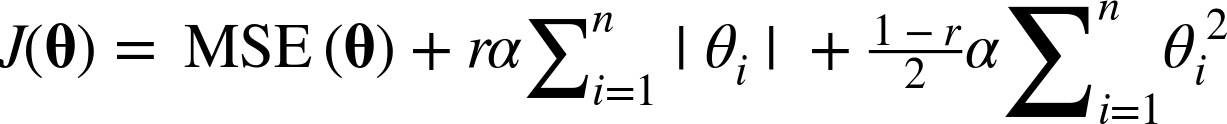

In [40]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
y_test_preds_l1_ra = elastic_net.predict(X_test)

print("Predictions:", y_test_preds_l1_ra)

Predictions: [4.07064162 0.545887   5.97806655 ... 3.4900734  4.79277926 5.93181079]


In [41]:
l1_ra_mse = mean_squared_error(y_test, y_test_preds_l1_ra)
l1_ra_mse = np.sqrt(l1_ra_mse)
print('l1_ra_mse:', l1_ra_mse)
l1_ra_r2 = r2_score(y_test, y_test_preds_l1_ra)
print('l1_ra_r2:', l1_ra_r2 )

l1_ra_mse: 5.42053160804103
l1_ra_r2: 0.36456397748208935


# Logistic Regression

#### Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (Eg: what is the probability if a patient would survive?).  If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### Estimating Probabilities

#### Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. 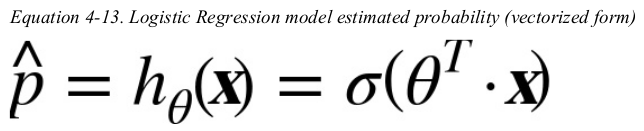

#### The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1. where the sigmoid function is represented by, 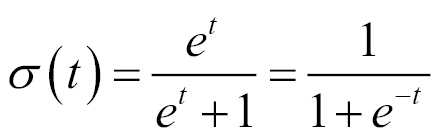

Saving figure logistic_function_plot


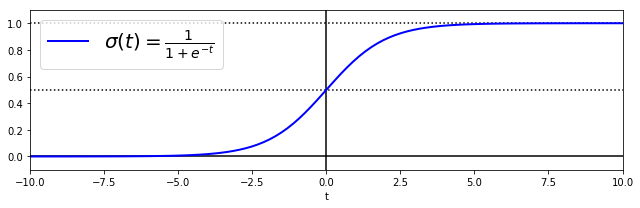

In [42]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

#### Once the Logistic Regression model has estimated the probability ˆp = h (x) that an instance x belongs to the positive class, it can make its prediction ŷ easily. 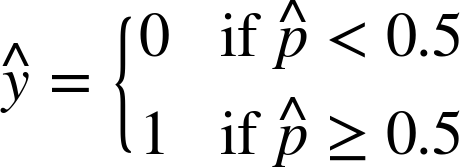 Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if x θ is positive and 0 if it is negative.

In [43]:
final_df = pd.read_csv('final_df.csv') 

In [121]:
final_df.head(10)

,hospital_expire_flag,LOS,blood,neoplasms,ICU,Neuro_ICU,abnormalAbsolute Lymphocyte Count,abnormalAbsolute Neutrophil Count,abnormalBasophils,abnormalEosinophils,abnormalHematocrit,abnormalHemoglobin,abnormalMCV,abnormalMonocytes,abnormalNeutrophils,abnormalPlatelet Count,abnormalRBC,abnormalRDW,abnormalWBC,normalAbsolute Lymphocyte Count,normalAbsolute Neutrophil Count,normalBasophils,normalEosinophils,normalHematocrit,normalHemoglobin,normalMCV,normalMonocytes,normalNeutrophils,normalPlatelet Count,normalRBC,normalRDW,normalWBC,abnormalAlanine Aminotransferase (ALT),abnormalAlbumin,abnormalAlkaline Phosphatase,abnormalAsparate Aminotransferase (AST),"abnormalBilirubin, Total",abnormalCreatine Kinase (CK),abnormalGlobulin,abnormalPT,abnormalPotassium,abnormalSodium,normalAlanine Aminotransferase (ALT),normalAlbumin,normalAlkaline Phosphatase,normalAsparate Aminotransferase (AST),"normalBilirubin, Total",normalCreatine Kinase (CK),normalGlobulin,normalPT,normalPotassium,normalSodium,abnormalC-Reactive Protein,"abnormalCholesterol, HDL","abnormalCholesterol, LDL, Calculated","abnormalCholesterol, Total",abnormalCreatinine,abnormalLactate Dehydrogenase (LD),abnormalUrea Nitrogen,abnormalUric Acid,normalC-Reactive Protein,"normalCholesterol, HDL","normalCholesterol, LDL, Calculated","normalCholesterol, Total",normalCreatinine,normalLactate Dehydrogenase (LD),normalUrea Nitrogen,normalUric Acid,ADM_AMBULATORY OBSERVATION,ADM_DIRECT EMER.,ADM_DIRECT OBSERVATION,ADM_ELECTIVE,ADM_EU OBSERVATION,ADM_EW EMER.,ADM_OBSERVATION ADMIT,ADM_SURGICAL SAME DAY ADMISSION,ADM_URGENT,INS_Medicaid,INS_Medicare,INS_Other,ETH_AMERICAN INDIAN/ALASKA NATIVE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_MARRIED,MAR_SINGLE,MAR_Unknown,MAR_WIDOWED,GEN_F,GEN_M
0,1,75.586111,2,3,1,0,80.0,80.0,19.0,59.0,87.0,87.0,0.0,54.0,76.0,125.0,0.0,19.0,0.0,0.0,0.0,61.0,21.0,0.0,0.0,86.0,26.0,4.0,0.0,6.0,67.0,7.0,13.0,10.0,36.0,8.0,2.0,2.0,0.0,6.0,3.0,3.0,72.0,40.0,49.0,77.0,82.0,0.0,0.0,11.0,99.0,97.0,0.0,0.0,0.0,0.0,64.0,43.0,100.0,13.0,0.0,0.0,0.0,0.0,36.0,18.0,0.0,18.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
1,0,3.295833,3,1,1,0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
2,0,5.958333,2,0,1,0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,1.0,4.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,3.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
3,0,12.635417,2,0,1,0,1.0,2.0,0.0,0.0,26.0,20.0,0.0,2.0,1.0,5.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,18.0,0.0,1.0,13.0,0.0,18.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19.0,19.0,0.0,0.0,0.0,0.0,9.0,0.0,18.0,0.0,0.0,1.0,1.0,1.0,9.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
4,0,4.928472,1,0,1,0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5,1,68.491667,4,1,1,0,63.0,63.0,16.0,0.0,89.0,89.0,19.0,23.0,61.0,89.0,6.0,9.0,0.0,0.0,0.0,47.0,63.0,0.0,0.0,67.0,40.0,2.0,0.0,2.0,77.0,7.0,6.0,32.0,57.0,7.0,20.0,5.0,0.0,42.0,11.0,14.0,61.0,14.0,10.0,60.0,48.0,2.0,0.0,0.0,79.0,76.0,0.0,0.0,0.0,0.0,29.0,61.0,8.0,4.0,0.0,0.0,0.0,0.0,61.0,0.0,82.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
6,0,5.218750,0,1,1,0,0.0,0.0,0.0,0.0,16.0,6.0,6.0,0.0,1.0,4.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0

In [168]:
# Target Variable (Length-of-Stay)
y = final_df['hospital_expire_flag'].values # 0 if alive, 1 if dead
# print(Survival)
# Prediction Features
X = final_df.drop(columns=['hospital_expire_flag']) 
# print(X.shape)
# X.info()

In [169]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

print("Training set has {} samples.".format(y_train.shape[0]))
print("Testing set has {} samples.".format(y_test.shape[0]))

Training set has 27572 samples.
Testing set has 6893 samples.
Training set has 27572 samples.
Testing set has 6893 samples.


In [170]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train,y_train)

/home/jupyter-remerine/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [171]:
y_test_preds1 = log_reg.predict(X_test) 

print("Predictions:", y_test_preds1)

Predictions: [0 0 0 ... 0 0 0]


In [172]:
# y_test_preds1 = y_test_preds1.reshape(-1, 1)

In [173]:
X_test.shape

(6893, 95)

In [174]:
y_test_preds1.shape

(6893,)

ValueError: x and y must be the same size

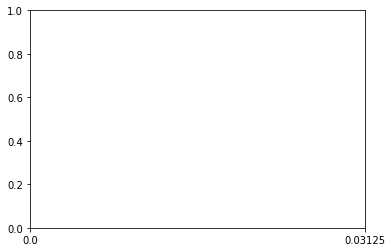

In [200]:
plt.scatter(X_test, y_test_preds1==0, "go", linewidth=2, label="Alive")
plt.scatter(X_test, y_test_preds1==1, "bo", linewidth=2, label="Dead") 